# **Import python libraries and dataset**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
cities = ['Mumbai', 'Bengaluru','Delhi','Thiruvananthapuram','Kolkata']
data1=data[data['City'].isin(cities)]
data1.head()

StationId           StationName   City  State  Status        Date  \
4365     DL001  Alipur, Delhi - DPCC  Delhi  Delhi  Active  2018-11-11   
4366     DL001  Alipur, Delhi - DPCC  Delhi  Delhi  Active  2018-11-12   
4367     DL001  Alipur, Delhi - DPCC  Delhi  Delhi  Active  2018-11-13   
4368     DL001  Alipur, Delhi - DPCC  Delhi  Delhi  Active  2018-11-14   
4369     DL001  Alipur, Delhi - DPCC  Delhi  Delhi  Active  2018-11-15   

       PM2.5    PM10     NO     NO2    NOx    NH3    CO    SO2     O3  \
4365  232.36  415.28   1.72   79.86  43.87  37.40  1.49  23.48  46.28   
4366  238.43  348.91   3.25   78.95  44.63  36.04  1.53  14.38  45.31   
4367  284.83  427.40  19.98  112.54  76.15  41.25  1.43  21.33  30.40   
4368  150.41  214.16   6.35   96.17  56.30  36.02  0.99  12.74  41.87   
4369  106.11  154.36   7.36   77.52  47.21  30.45  0.70  12.46  27.93   

      Benzene  Toluene  Xylene    AQI AQI_Bucket  
4365     6.14    17.67    0.28    NaN        NaN  
4366     6.64    13.58    0.30  404.0     Severe  
4367     8.80    43.51    0.94  406.0     Severe  
4368     5.64    28.30    0.51  372.0  Very Poor  
4369     4.20    33.48    0.59  280.0       Poor

In [ ]:
data1.shape

(49861, 20)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49861 entries, 4365 to 77397
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StationId    49861 non-null  object 
 1   StationName  49861 non-null  object 
 2   City         49861 non-null  object 
 3   State        49861 non-null  object 
 4   Status       49861 non-null  object 
 5   Date         49861 non-null  object 
 6   PM2.5        45189 non-null  float64
 7   PM10         41175 non-null  float64
 8   NO           46409 non-null  float64
 9   NO2          47441 non-null  float64
 10  NOx          46619 non-null  float64
 11  NH3          35161 non-null  float64
 12  CO           47021 non-null  float64
 13  SO2          41153 non-null  float64
 14  O3           43927 non-null  float64
 15  Benzene      37185 non-null  float64
 16  Toluene      32376 non-null  float64
 17  Xylene       5528 non-null   float64
 18  AQI          46109 non-null  float64
 19  A

In [ ]:
data1.isnull().sum()#checking for null values present

StationId          0
StationName        0
City               0
State              0
Status             0
Date               0
PM2.5           4672
PM10            8686
NO              3452
NO2             2420
NOx             3242
NH3            14700
CO              2840
SO2             8708
O3              5934
Benzene        12676
Toluene        17485
Xylene         44333
AQI             3752
AQI_Bucket      3752
dtype: int64

# **Handling missing values**

In [ ]:
data1.columns

Index(['StationId', 'StationName', 'City', 'State', 'Status', 'Date', 'PM2.5',
       'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene',
       'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
data1=data1.drop(['StationId','Status','NO','NOx', 'NH3','Benzene', 'Toluene', 'Xylene'],axis=1) 
#removing unwanted columns ('NO','NOx', 'NH3','Benzene', 'Toluene', 'Xylene' not used for calculating AQI)
data1.head()

StationName   City  State        Date   PM2.5    PM10     NO2  \
4365  Alipur, Delhi - DPCC  Delhi  Delhi  2018-11-11  232.36  415.28   79.86   
4366  Alipur, Delhi - DPCC  Delhi  Delhi  2018-11-12  238.43  348.91   78.95   
4367  Alipur, Delhi - DPCC  Delhi  Delhi  2018-11-13  284.83  427.40  112.54   
4368  Alipur, Delhi - DPCC  Delhi  Delhi  2018-11-14  150.41  214.16   96.17   
4369  Alipur, Delhi - DPCC  Delhi  Delhi  2018-11-15  106.11  154.36   77.52   

        CO    SO2     O3    AQI AQI_Bucket  
4365  1.49  23.48  46.28    NaN        NaN  
4366  1.53  14.38  45.31  404.0     Severe  
4367  1.43  21.33  30.40  406.0     Severe  
4368  0.99  12.74  41.87  372.0  Very Poor  
4369  0.70  12.46  27.93  280.0       Poor

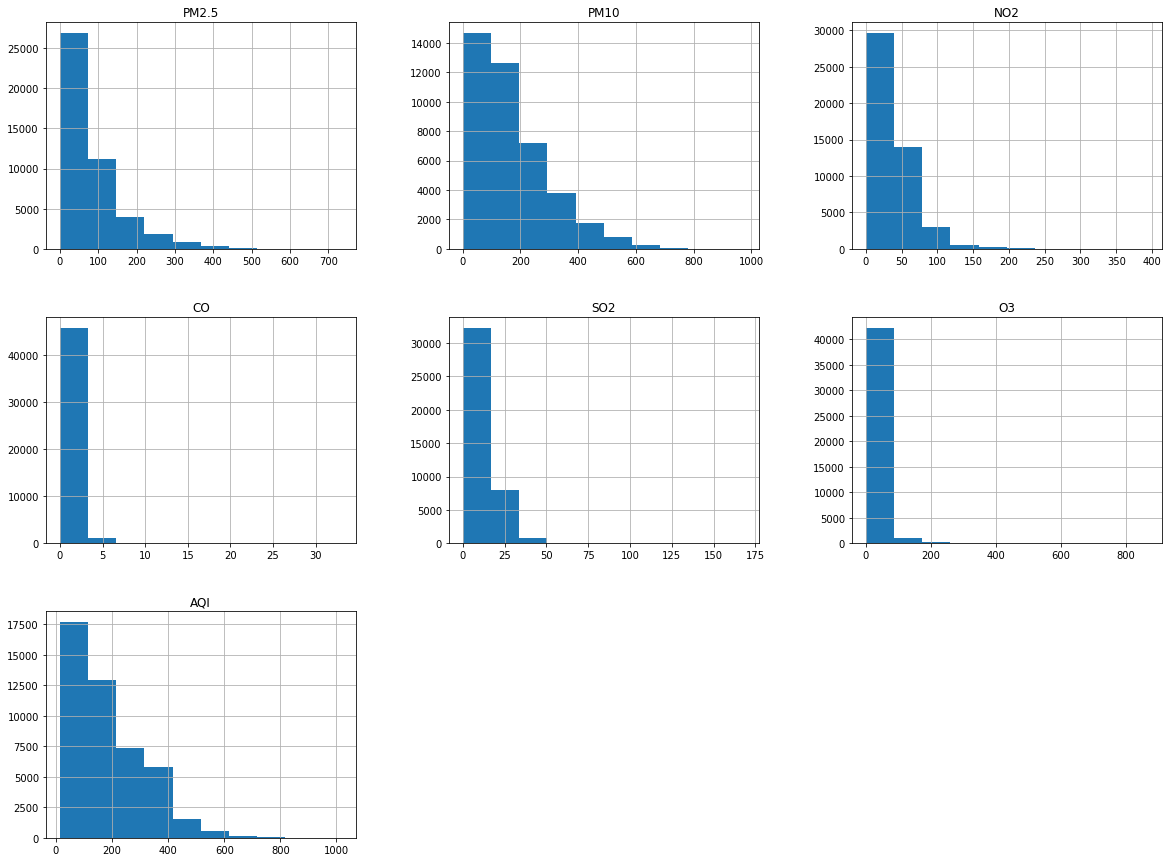

In [ ]:
freq_graph=data1.select_dtypes(include=['float'])
freq_graph.hist(figsize=(20,15))
plt.show() # analysing whether mean or median is using while dealing with outliers by looking into measure of central tendency(skewness)
#the graph shows all the are rightly skewed so we can use meadian

In [ ]:
#replacing missing values with median

data1['PM2.5'] = data1['PM2.5'].groupby(data1['City']).transform(lambda x: x.fillna(x.median()))
data1['PM10'] = data1['PM10'].groupby(data1['City']).transform(lambda x: x.fillna(x.median()))
data1['NO2'] =data1['NO2'].groupby(data1['City']).transform(lambda x: x.fillna(x.median()))
data1['CO'] = data1['CO']  .groupby(data1['City']).transform(lambda x: x.fillna(x.median()))
data1['SO2'] = data1['SO2'].groupby(data1['City']).transform(lambda x: x.fillna(x.median()))
data1['O3'] = data1['O3'] .groupby(data1['City']).transform(lambda x: x.fillna(x.median()))
data1['AQI'] = data1['AQI'] .groupby(data1['City']).transform(lambda x: x.fillna(x.median()))


In [ ]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

In [ ]:
data1["AQI_Bucket"] = data1["AQI"].apply(lambda x: get_AQI_bucket(x))

In [ ]:
data1.isnull().sum()

StationName    0
City           0
State          0
Date           0
PM2.5          0
PM10           0
NO2            0
CO             0
SO2            0
O3             0
AQI            0
AQI_Bucket     0
dtype: int64

In [ ]:
data1.describe()

PM2.5          PM10           NO2            CO           SO2  \
count  49861.000000  49861.000000  49861.000000  49861.000000  49861.000000   
mean      81.236118    165.565811     37.453018      1.158682     11.587575   
std       75.560886    119.823305     28.242605      0.891868      8.118981   
min        0.020000      1.000000      0.020000      0.000000      0.010000   
25%       30.030000     70.540000     18.150000      0.630000      5.910000   
50%       57.290000    140.860000     30.760000      0.970000     10.930000   
75%      101.850000    211.690000     49.260000      1.440000     14.010000   
max      734.560000    976.770000    394.040000     33.060000    168.650000   

                 O3          AQI  
count  49861.000000  49861.00000  
mean      37.231164    182.70518  
std       35.336329    120.94136  
min        0.020000     14.00000  
25%       20.330000     89.00000  
50%       31.240000    146.00000  
75%       44.480000    257.00000  
max      868.200000   1019.00000

In [ ]:
data1.City.value_counts()

Delhi                 33000
Bengaluru              8235
Mumbai                 4408
Kolkata                3165
Thiruvananthapuram     1053
Name: City, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


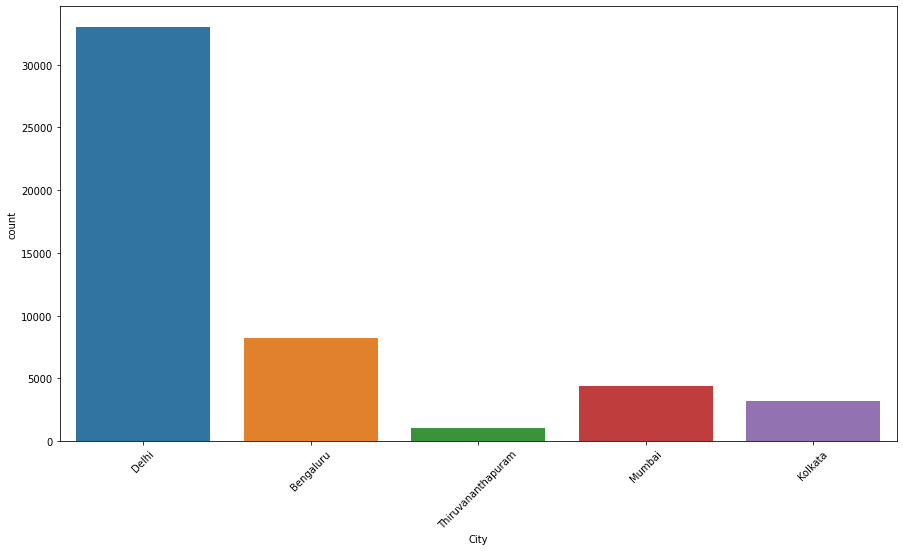

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.countplot(data1['City'])#count plot

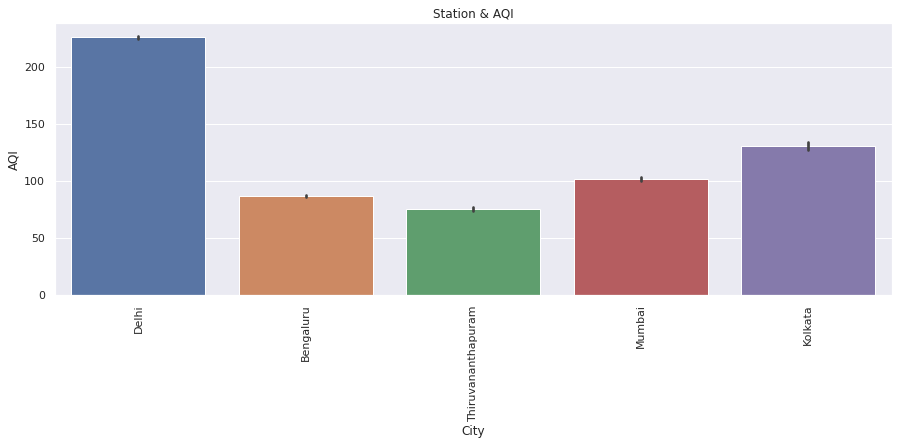

In [ ]:
#AQI VS City
plt.figure(figsize=(15,5))
sns.set(font_scale=1)
sns.barplot(x='City', y='AQI', data=data1).set(title ='Station & AQI')
plt.xticks(rotation=90)
plt.show()

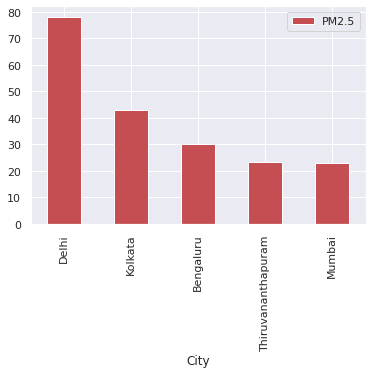

In [ ]:
data1[['PM2.5','City']].groupby(["City"]).median().sort_values(by='PM2.5',ascending=False).head(10).plot.bar(color='r')
plt.show()

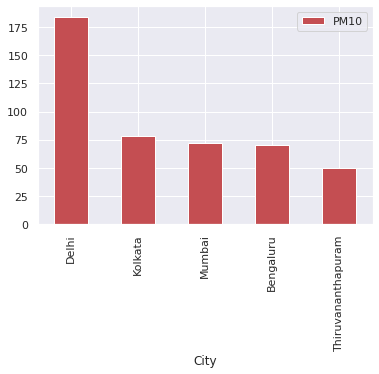

In [ ]:
data1[['PM10','City']].groupby(["City"]).median().sort_values(by='PM10',ascending=False).head(10).plot.bar(color='r')
plt.show()

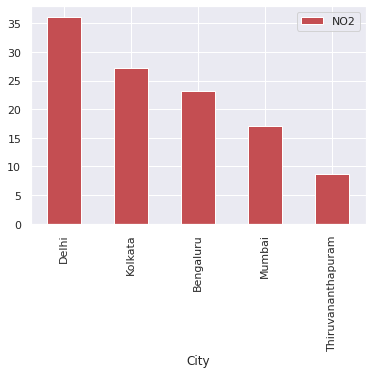

In [ ]:
data1[['NO2','City']].groupby(["City"]).median().sort_values(by='NO2',ascending=False).head(10).plot.bar(color='r')
plt.show()

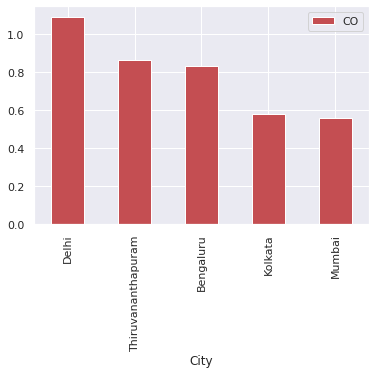

In [ ]:
data1[['CO','City']].groupby(["City"]).median().sort_values(by='CO',ascending=False).head(10).plot.bar(color='r')
plt.show()

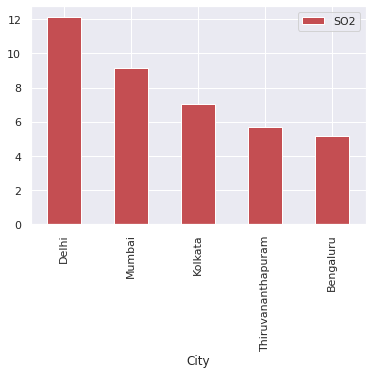

In [ ]:
data1[['SO2','City']].groupby(["City"]).median().sort_values(by='SO2',ascending=False).head(10).plot.bar(color='r')
plt.show()

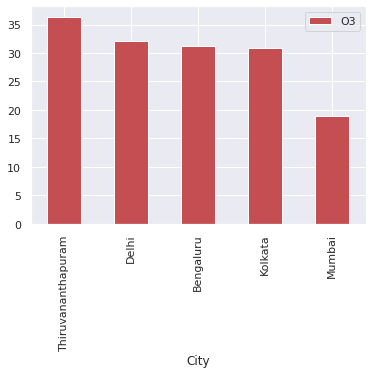

In [ ]:
data1[['O3','City']].groupby(["City"]).median().sort_values(by='O3',ascending=False).head(10).plot.bar(color='r')
plt.show()

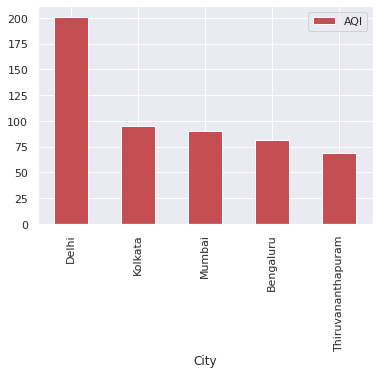

In [ ]:
data1[['AQI','City']].groupby(["City"]).median().sort_values(by='AQI',ascending=False).head(10).plot.bar(color='r')
plt.show()

In [ ]:
data2=data1.copy()

In [ ]:
#year vs AQI
import datetime as dt
data1['Date'] = pd.to_datetime(data1['Date'])
data1['year'] = data1['Date'].dt.year
data1['month'] =data1['Date'].dt.month
data1['day'] =data1['Date'].dt.day

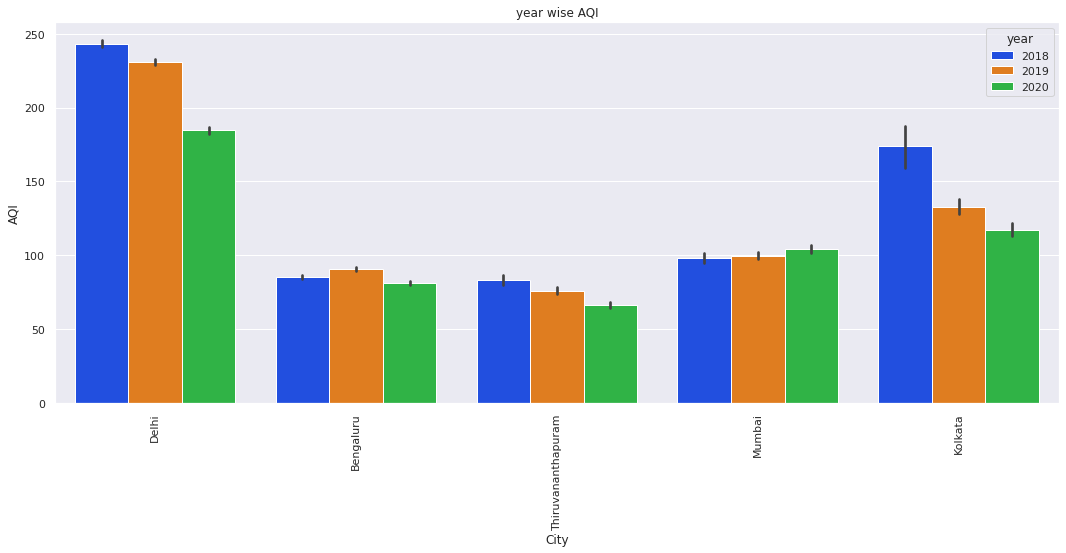

In [ ]:
plt.figure(figsize=(18,7))
sns.set(font_scale=1)
sns.barplot(x='City', y='AQI', data=data1,hue='year',palette='bright').set(title ='year wise AQI')
plt.xticks(rotation=90)
plt.show()

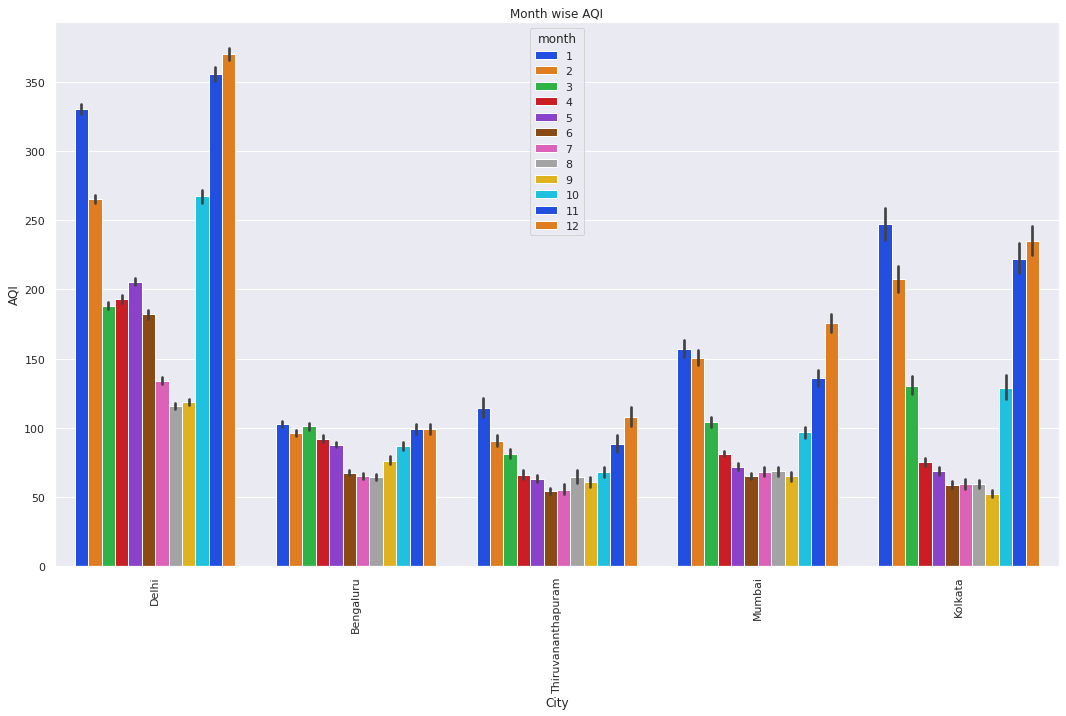

In [ ]:
plt.figure(figsize=(18,10))
sns.set(font_scale=1)
sns.barplot(x='City', y='AQI', data=data1,hue='month',palette = 'bright').set(title ='Month wise AQI')
plt.xticks(rotation=90)
plt.show()

# **Outlier Handling**

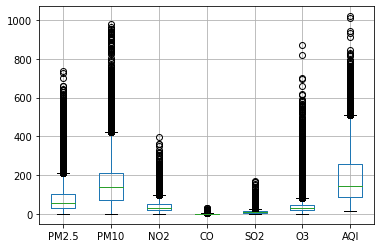

In [ ]:
bxplt = pd.DataFrame(data = data1, columns = ['PM2.5','PM10','NO2','CO','SO2','O3','AQI'])
bxplt.boxplot()

In [ ]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

In [ ]:
#PM10
PM10_outliers = detect_outliers_iqr(data1['PM10'])
print("Outliers from IQR method: ", PM10_outliers)
# print(len(PM10_outliers))

Outliers from IQR method:  [423.44, 423.44, 423.45, 423.46, 423.46, 423.5, 423.51, 423.54, 423.58, 423.6, 423.63, 423.64, 423.68, 423.84, 423.85, 423.89, 423.91, 423.96, 423.97, 423.98, 423.99, 424.05, 424.05, 424.06, 424.08, 424.08, 424.08, 424.14, 424.19, 424.21, 424.22, 424.33, 424.46, 424.49, 424.69, 424.83, 424.94, 424.96, 425.0, 425.08, 425.12, 425.17, 425.17, 425.29, 425.32, 425.4, 425.44, 425.44, 425.45, 425.45, 425.46, 425.59, 425.61, 425.68, 425.72, 425.73, 426.06, 426.07, 426.1, 426.22, 426.48, 426.58, 426.6, 426.61, 426.64, 426.68, 426.77, 426.79, 426.83, 426.88, 426.91, 426.92, 426.92, 426.93, 426.93, 426.93, 426.96, 427.0, 427.02, 427.14, 427.17, 427.29, 427.33, 427.34, 427.4, 427.41, 427.5, 427.52, 427.56, 427.6, 427.65, 427.68, 427.71, 427.75, 427.79, 427.94, 427.95, 428.04, 428.16, 428.17, 428.21, 428.22, 428.24, 428.24, 428.26, 428.27, 428.42, 428.49, 428.5, 428.53, 428.54, 428.55, 428.56, 428.61, 428.79, 428.79, 428.86, 428.88, 428.93, 428.97, 429.22, 429.27, 429.28,

In [ ]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(data1['PM10'], 10)
ninetieth_percentile = np.percentile(data1['PM10'], 90)
# print(tenth_percentile, ninetieth_percentile)
data1['PM10'] = np.where(data1['PM10']<tenth_percentile, tenth_percentile, data1['PM10'])
data1['PM10'] = np.where(data1['PM10']>ninetieth_percentile, ninetieth_percentile, data1['PM10'])
# print("Sample:", sample)
print("New array:",data1['PM10'])

New array: 4365     330.33
4366     330.33
4367     330.33
4368     214.16
4369     154.36
          ...  
77393     48.23
77394     48.23
77395     48.23
77396     48.23
77397     48.23
Name: PM10, Length: 49861, dtype: float64


In [ ]:
#PM2.5
PM25_outliers = detect_outliers_iqr(data1['PM2.5'])
print("Outliers from IQR method: ", PM25_outliers)

Outliers from IQR method:  [423.44, 423.44, 423.45, 423.46, 423.46, 423.5, 423.51, 423.54, 423.58, 423.6, 423.63, 423.64, 423.68, 423.84, 423.85, 423.89, 423.91, 423.96, 423.97, 423.98, 423.99, 424.05, 424.05, 424.06, 424.08, 424.08, 424.08, 424.14, 424.19, 424.21, 424.22, 424.33, 424.46, 424.49, 424.69, 424.83, 424.94, 424.96, 425.0, 425.08, 425.12, 425.17, 425.17, 425.29, 425.32, 425.4, 425.44, 425.44, 425.45, 425.45, 425.46, 425.59, 425.61, 425.68, 425.72, 425.73, 426.06, 426.07, 426.1, 426.22, 426.48, 426.58, 426.6, 426.61, 426.64, 426.68, 426.77, 426.79, 426.83, 426.88, 426.91, 426.92, 426.92, 426.93, 426.93, 426.93, 426.96, 427.0, 427.02, 427.14, 427.17, 427.29, 427.33, 427.34, 427.4, 427.41, 427.5, 427.52, 427.56, 427.6, 427.65, 427.68, 427.71, 427.75, 427.79, 427.94, 427.95, 428.04, 428.16, 428.17, 428.21, 428.22, 428.24, 428.24, 428.26, 428.27, 428.42, 428.49, 428.5, 428.53, 428.54, 428.55, 428.56, 428.61, 428.79, 428.79, 428.86, 428.88, 428.93, 428.97, 429.22, 429.27, 429.28,

In [ ]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(data1['PM2.5'], 10)
ninetieth_percentile = np.percentile(data1['PM2.5'], 90)
# print(tenth_percentile, ninetieth_percentile)
data1['PM2.5'] = np.where(data1['PM2.5']<tenth_percentile, tenth_percentile, data1['PM2.5'])
data1['PM2.5']= np.where(data1['PM2.5']>ninetieth_percentile, ninetieth_percentile, data1['PM2.5'])
# print("Sample:", sample)
print("New array:",data1['PM2.5'])

New array: 4365     179.29
4366     179.29
4367     179.29
4368     150.41
4369     106.11
          ...  
77393     18.89
77394     18.89
77395     18.89
77396     18.89
77397     18.89
Name: PM2.5, Length: 49861, dtype: float64


In [ ]:
#SO2
SO2_outliers = detect_outliers_iqr(data1['SO2'])
print("Outliers from IQR method: ", SO2_outliers)

Outliers from IQR method:  [423.44, 423.44, 423.45, 423.46, 423.46, 423.5, 423.51, 423.54, 423.58, 423.6, 423.63, 423.64, 423.68, 423.84, 423.85, 423.89, 423.91, 423.96, 423.97, 423.98, 423.99, 424.05, 424.05, 424.06, 424.08, 424.08, 424.08, 424.14, 424.19, 424.21, 424.22, 424.33, 424.46, 424.49, 424.69, 424.83, 424.94, 424.96, 425.0, 425.08, 425.12, 425.17, 425.17, 425.29, 425.32, 425.4, 425.44, 425.44, 425.45, 425.45, 425.46, 425.59, 425.61, 425.68, 425.72, 425.73, 426.06, 426.07, 426.1, 426.22, 426.48, 426.58, 426.6, 426.61, 426.64, 426.68, 426.77, 426.79, 426.83, 426.88, 426.91, 426.92, 426.92, 426.93, 426.93, 426.93, 426.96, 427.0, 427.02, 427.14, 427.17, 427.29, 427.33, 427.34, 427.4, 427.41, 427.5, 427.52, 427.56, 427.6, 427.65, 427.68, 427.71, 427.75, 427.79, 427.94, 427.95, 428.04, 428.16, 428.17, 428.21, 428.22, 428.24, 428.24, 428.26, 428.27, 428.42, 428.49, 428.5, 428.53, 428.54, 428.55, 428.56, 428.61, 428.79, 428.79, 428.86, 428.88, 428.93, 428.97, 429.22, 429.27, 429.28,

In [ ]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(data1['SO2'], 10)
ninetieth_percentile = np.percentile(data1['SO2'], 90)
# print(tenth_percentile, ninetieth_percentile)
data1['SO2'] = np.where(data1['SO2']<tenth_percentile, tenth_percentile, data1['SO2'])
data1['SO2']= np.where(data1['SO2']>ninetieth_percentile, ninetieth_percentile, data1['SO2'])
# print("Sample:", sample)
print("New array:",data1['SO2'])

New array: 4365     21.26
4366     14.38
4367     21.26
4368     12.74
4369     12.46
         ...  
77393     4.36
77394     3.49
77395     5.12
77396     5.88
77397     3.40
Name: SO2, Length: 49861, dtype: float64


In [ ]:
#CO
CO_outliers = detect_outliers_iqr(data1['CO'])
print("Outliers from IQR method: ", CO_outliers)

Outliers from IQR method:  [423.44, 423.44, 423.45, 423.46, 423.46, 423.5, 423.51, 423.54, 423.58, 423.6, 423.63, 423.64, 423.68, 423.84, 423.85, 423.89, 423.91, 423.96, 423.97, 423.98, 423.99, 424.05, 424.05, 424.06, 424.08, 424.08, 424.08, 424.14, 424.19, 424.21, 424.22, 424.33, 424.46, 424.49, 424.69, 424.83, 424.94, 424.96, 425.0, 425.08, 425.12, 425.17, 425.17, 425.29, 425.32, 425.4, 425.44, 425.44, 425.45, 425.45, 425.46, 425.59, 425.61, 425.68, 425.72, 425.73, 426.06, 426.07, 426.1, 426.22, 426.48, 426.58, 426.6, 426.61, 426.64, 426.68, 426.77, 426.79, 426.83, 426.88, 426.91, 426.92, 426.92, 426.93, 426.93, 426.93, 426.96, 427.0, 427.02, 427.14, 427.17, 427.29, 427.33, 427.34, 427.4, 427.41, 427.5, 427.52, 427.56, 427.6, 427.65, 427.68, 427.71, 427.75, 427.79, 427.94, 427.95, 428.04, 428.16, 428.17, 428.21, 428.22, 428.24, 428.24, 428.26, 428.27, 428.42, 428.49, 428.5, 428.53, 428.54, 428.55, 428.56, 428.61, 428.79, 428.79, 428.86, 428.88, 428.93, 428.97, 429.22, 429.27, 429.28,

In [ ]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(data1['CO'], 10)
ninetieth_percentile = np.percentile(data1['CO'], 90)
# print(tenth_percentile, ninetieth_percentile)
data1['CO'] = np.where(data1['CO']<tenth_percentile, tenth_percentile, data1['CO'])
data1['CO']= np.where(data1['CO']>ninetieth_percentile, ninetieth_percentile, data1['CO'])
# print("Sample:", sample)
print("New array:",data1['CO'])

New array: 4365     1.49
4366     1.53
4367     1.43
4368     0.99
4369     0.70
         ... 
77393    0.69
77394    0.68
77395    0.78
77396    0.69
77397    0.58
Name: CO, Length: 49861, dtype: float64


In [ ]:
#O3
O3_outliers = detect_outliers_iqr(data1['O3'])
print("Outliers from IQR method: ", O3_outliers)

Outliers from IQR method:  [423.44, 423.44, 423.45, 423.46, 423.46, 423.5, 423.51, 423.54, 423.58, 423.6, 423.63, 423.64, 423.68, 423.84, 423.85, 423.89, 423.91, 423.96, 423.97, 423.98, 423.99, 424.05, 424.05, 424.06, 424.08, 424.08, 424.08, 424.14, 424.19, 424.21, 424.22, 424.33, 424.46, 424.49, 424.69, 424.83, 424.94, 424.96, 425.0, 425.08, 425.12, 425.17, 425.17, 425.29, 425.32, 425.4, 425.44, 425.44, 425.45, 425.45, 425.46, 425.59, 425.61, 425.68, 425.72, 425.73, 426.06, 426.07, 426.1, 426.22, 426.48, 426.58, 426.6, 426.61, 426.64, 426.68, 426.77, 426.79, 426.83, 426.88, 426.91, 426.92, 426.92, 426.93, 426.93, 426.93, 426.96, 427.0, 427.02, 427.14, 427.17, 427.29, 427.33, 427.34, 427.4, 427.41, 427.5, 427.52, 427.56, 427.6, 427.65, 427.68, 427.71, 427.75, 427.79, 427.94, 427.95, 428.04, 428.16, 428.17, 428.21, 428.22, 428.24, 428.24, 428.26, 428.27, 428.42, 428.49, 428.5, 428.53, 428.54, 428.55, 428.56, 428.61, 428.79, 428.79, 428.86, 428.88, 428.93, 428.97, 429.22, 429.27, 429.28,

In [ ]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(data1['O3'], 10)
ninetieth_percentile = np.percentile(data1['O3'], 90)
# print(tenth_percentile, ninetieth_percentile)
data1['O3'] = np.where(data1['O3']<tenth_percentile, tenth_percentile, data1['O3'])
data1['O3']= np.where(data1['O3']>ninetieth_percentile, ninetieth_percentile, data1['O3'])
# print("Sample:", sample)
print("New array:",data1['O3'].head())

New array: 4365    46.28
4366    45.31
4367    30.40
4368    41.87
4369    27.93
Name: O3, dtype: float64


In [ ]:
#NO2
O3_outliers = detect_outliers_iqr(data1['NO2'])
print("Outliers from IQR method: ", O3_outliers)

Outliers from IQR method:  [423.44, 423.44, 423.45, 423.46, 423.46, 423.5, 423.51, 423.54, 423.58, 423.6, 423.63, 423.64, 423.68, 423.84, 423.85, 423.89, 423.91, 423.96, 423.97, 423.98, 423.99, 424.05, 424.05, 424.06, 424.08, 424.08, 424.08, 424.14, 424.19, 424.21, 424.22, 424.33, 424.46, 424.49, 424.69, 424.83, 424.94, 424.96, 425.0, 425.08, 425.12, 425.17, 425.17, 425.29, 425.32, 425.4, 425.44, 425.44, 425.45, 425.45, 425.46, 425.59, 425.61, 425.68, 425.72, 425.73, 426.06, 426.07, 426.1, 426.22, 426.48, 426.58, 426.6, 426.61, 426.64, 426.68, 426.77, 426.79, 426.83, 426.88, 426.91, 426.92, 426.92, 426.93, 426.93, 426.93, 426.96, 427.0, 427.02, 427.14, 427.17, 427.29, 427.33, 427.34, 427.4, 427.41, 427.5, 427.52, 427.56, 427.6, 427.65, 427.68, 427.71, 427.75, 427.79, 427.94, 427.95, 428.04, 428.16, 428.17, 428.21, 428.22, 428.24, 428.24, 428.26, 428.27, 428.42, 428.49, 428.5, 428.53, 428.54, 428.55, 428.56, 428.61, 428.79, 428.79, 428.86, 428.88, 428.93, 428.97, 429.22, 429.27, 429.28,

In [ ]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(data1['NO2'], 10)
ninetieth_percentile = np.percentile(data1['NO2'], 90)
# print(tenth_percentile, ninetieth_percentile)
data1['NO2'] = np.where(data1['NO2']<tenth_percentile, tenth_percentile, data1['NO2'])
data1['NO2']= np.where(data1['NO2']>ninetieth_percentile, ninetieth_percentile, data1['NO2'])
# print("Sample:", sample)
print("New array:",data1['NO2'].head())

New array: 4365    72.82
4366    72.82
4367    72.82
4368    72.82
4369    72.82
Name: NO2, dtype: float64


In [ ]:
#AQI
AQI_outliers = detect_outliers_iqr(data1['AQI'])
print("Outliers from IQR method: ", AQI_outliers)

Outliers from IQR method:  [423.44, 423.44, 423.45, 423.46, 423.46, 423.5, 423.51, 423.54, 423.58, 423.6, 423.63, 423.64, 423.68, 423.84, 423.85, 423.89, 423.91, 423.96, 423.97, 423.98, 423.99, 424.05, 424.05, 424.06, 424.08, 424.08, 424.08, 424.14, 424.19, 424.21, 424.22, 424.33, 424.46, 424.49, 424.69, 424.83, 424.94, 424.96, 425.0, 425.08, 425.12, 425.17, 425.17, 425.29, 425.32, 425.4, 425.44, 425.44, 425.45, 425.45, 425.46, 425.59, 425.61, 425.68, 425.72, 425.73, 426.06, 426.07, 426.1, 426.22, 426.48, 426.58, 426.6, 426.61, 426.64, 426.68, 426.77, 426.79, 426.83, 426.88, 426.91, 426.92, 426.92, 426.93, 426.93, 426.93, 426.96, 427.0, 427.02, 427.14, 427.17, 427.29, 427.33, 427.34, 427.4, 427.41, 427.5, 427.52, 427.56, 427.6, 427.65, 427.68, 427.71, 427.75, 427.79, 427.94, 427.95, 428.04, 428.16, 428.17, 428.21, 428.22, 428.24, 428.24, 428.26, 428.27, 428.42, 428.49, 428.5, 428.53, 428.54, 428.55, 428.56, 428.61, 428.79, 428.79, 428.86, 428.88, 428.93, 428.97, 429.22, 429.27, 429.28,

In [ ]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(data1['AQI'], 10)
ninetieth_percentile = np.percentile(data1['AQI'], 90)
# print(tenth_percentile, ninetieth_percentile)
data1['AQI'] = np.where(data1['AQI']<tenth_percentile, tenth_percentile, data1['AQI'])
data1['AQI']= np.where(data1['AQI']>ninetieth_percentile, ninetieth_percentile, data1['AQI'])
# print("Sample:", sample)
print("New array:",data1['AQI'])

New array: 4365     201.0
4366     353.0
4367     353.0
4368     353.0
4369     280.0
         ...  
77393     61.0
77394     65.0
77395     63.0
77396     61.0
77397     61.0
Name: AQI, Length: 49861, dtype: float64


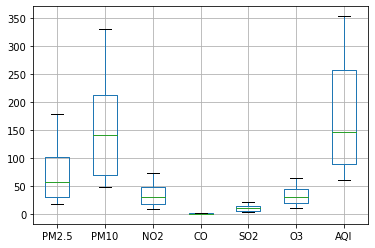

In [ ]:
bxplt = pd.DataFrame(data = data1, columns = ['PM2.5','PM10','NO2','CO','SO2','O3','AQI'])
bxplt.boxplot()

In [ ]:
data2=data1.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data1['AQI_Bucket'] = encoder.fit_transform(data1['AQI_Bucket'])
data1['StationName'] = encoder.fit_transform(data1['StationName'])
data1['City'] = encoder.fit_transform(data1['City'])
data1['State'] = encoder.fit_transform(data1['State'])	

# **Multiple Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

In [ ]:
ind = data1.drop(['AQI_Bucket','AQI','Date'],axis=1)  # independent variables
ind

StationName  City  State   PM2.5    PM10     NO2    CO    SO2     O3
4365             0     1      0  179.29  330.33  72.820  1.49  21.26  46.28
4366             0     1      0  179.29  330.33  72.820  1.53  14.38  45.31
4367             0     1      0  179.29  330.33  72.820  1.43  21.26  30.40
4368             0     1      0  150.41  214.16  72.820  0.99  12.74  41.87
4369             0     1      0  106.11  154.36  72.820  0.70  12.46  27.93
...            ...   ...    ...     ...     ...     ...   ...    ...    ...
77393           62     2      4   18.89   48.23  27.205  0.69   4.36  30.59
77394           62     2      4   18.89   48.23  27.205  0.68   3.49  38.95
77395           62     2      4   18.89   48.23  72.820  0.78   5.12  38.17
77396           62     2      4   18.89   48.23  29.130  0.69   5.88  29.64
77397           62     2      4   18.89   48.23  22.500  0.58   3.40  13.10

[49861 rows x 9 columns]

In [ ]:
y=data1['AQI'] #  dependent variable
y

4365     201.0
4366     353.0
4367     353.0
4368     353.0
4369     280.0
         ...  
77393     61.0
77394     65.0
77395     63.0
77396     61.0
77397     61.0
Name: AQI, Length: 49861, dtype: float64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(ind,y,test_size=.3,random_state=42)

In [ ]:
ml=LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=ml.predict(X_test)
y_pred

array([ 73.36615821, 325.2529467 , 178.86489968, ..., 157.70631118,
       206.60169338, 113.86672998])

([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

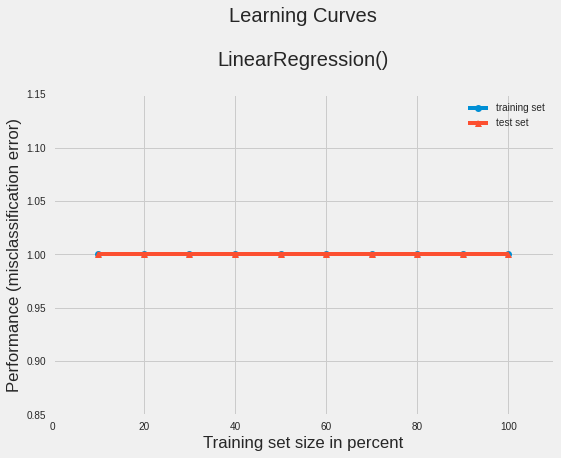

In [ ]:
from mlxtend.plotting import plot_learning_curves
 
# Plot the learning curves
plot_learning_curves(X_train, y_train, X_test, y_test, ml)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


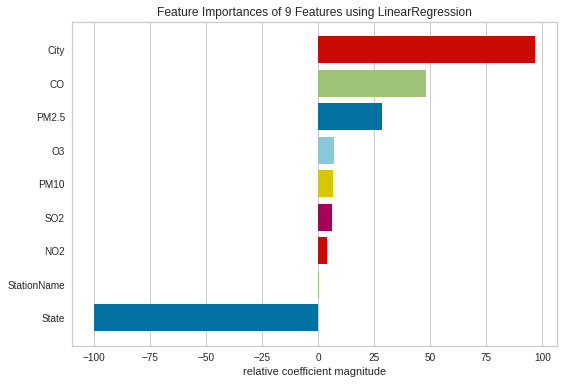

In [ ]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(ml)
viz.fit(X_train, y_train)
viz.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(ml, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.88358396 0.88480973 0.88132679 0.88285184 0.87613753 0.8800172
 0.87740649 0.88428581 0.88836944 0.88182905]


In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.8761375316464315, 0.8820617850521799, 0.8883694398358866)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


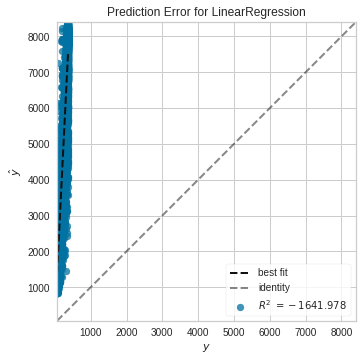

In [ ]:
visualizer = PredictionError(ml)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()    

In [ ]:
from sklearn.metrics import r2_score 
r2_score(y_test,y_pred)

0.8791686264827809

# **Logistic** **Regression** 

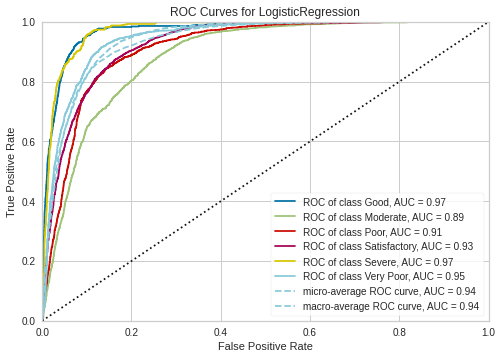

In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(LR)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()  

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data2['StationName'] = encoder.fit_transform(data2['StationName'])
data2['City'] = encoder.fit_transform(data2['City'])
data2['State'] = encoder.fit_transform(data2['State'])	

In [ ]:
data2.head()

StationName  City  State        Date   PM2.5    PM10    NO2    CO  \
4365            0     1      0  2018-11-11  179.29  330.33  72.82  1.49   
4366            0     1      0  2018-11-12  179.29  330.33  72.82  1.53   
4367            0     1      0  2018-11-13  179.29  330.33  72.82  1.43   
4368            0     1      0  2018-11-14  150.41  214.16  72.82  0.99   
4369            0     1      0  2018-11-15  106.11  154.36  72.82  0.70   

        SO2     O3    AQI AQI_Bucket  
4365  21.26  46.28  201.0       Poor  
4366  14.38  45.31  353.0     Severe  
4367  21.26  30.40  353.0     Severe  
4368  12.74  41.87  353.0  Very Poor  
4369  12.46  27.93  280.0       Poor

In [ ]:
y=data2['AQI_Bucket']
x=data2.drop(['AQI_Bucket','AQI','Date'],axis=1) #splitting dependent and independent data

In [ ]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.73086932, -0.15957404, -0.58676638,  2.05162455,  1.88874743,
         1.86105755,  0.75092147,  1.84595918,  0.76510423],
       [-1.73086932, -0.15957404, -0.58676638,  2.05162455,  1.88874743,
         1.86105755,  0.82415749,  0.61881311,  0.70605443],
       [-1.73086932, -0.15957404, -0.58676638,  2.05162455,  1.88874743,
         1.86105755,  0.64106744,  1.84595918, -0.20160792],
       [-1.73086932, -0.15957404, -0.58676638,  1.49150046,  0.62620915,
         1.86105755, -0.16452878,  0.32629573,  0.49664071],
       [-1.73086932, -0.15957404, -0.58676638,  0.63230735, -0.02369865,
         1.86105755, -0.69548992,  0.27635374, -0.35197184]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (39888, 9) (39888,)
Test set: (9973, 9) (9973,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression().fit(X_train,y_train)
LR

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
yhat = LR.predict(X_test)
yhat

array(['Satisfactory', 'Very Poor', 'Moderate', ..., 'Moderate', 'Poor',
       'Moderate'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy=accuracy_score(y_test,yhat)*100
print("Accuracy of the model is {:.2f}".format(accuracy))
     

Accuracy of the model is 69.15


In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[1.32990606e-01, 6.48296089e-02, 3.56195174e-04, 8.01823352e-01,
        9.75461837e-14, 2.37652074e-07],
       [1.01382676e-20, 2.80215803e-04, 7.16674424e-02, 1.73694805e-08,
        1.85972974e-01, 7.42079351e-01],
       [2.22504487e-08, 5.93350161e-01, 3.67298686e-01, 2.58474874e-02,
        3.72024595e-05, 1.34664408e-02],
       ...,
       [1.31208518e-07, 8.50851917e-01, 6.93747006e-02, 7.91662841e-02,
        1.67573831e-06, 6.05290828e-04],
       [1.10724615e-16, 9.88847838e-02, 6.41434710e-01, 3.79387619e-05,
        1.03892108e-02, 2.49253357e-01],
       [3.76630731e-07, 8.40619047e-01, 8.12839595e-02, 7.72477755e-02,
        7.32762744e-07, 8.48108228e-04]])

In [ ]:
confusion_matrix(y_test,yhat)

array([[ 331,    8,    0,  238,    0,    0],
       [   3, 2099,  324,  495,    0,   10],
       [   0,  498, 1112,   15,    2,  184],
       [ 144,  473,    4, 2074,    1,    4],
       [   0,    1,   16,    0,  380,  176],
       [   0,   46,  231,    2,  202,  900]])

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

([0.3026579739217653,
  0.30562868246207847,
  0.3021895370215611,
  0.2994045753682231,
  0.30054151624548736,
  0.2968410496406485,
  0.2985208266179578,
  0.30203697900344717,
  0.30237611075517423,
  0.3044273967107902],
 [0.3095357465155921,
  0.30702897824125136,
  0.3067281660483305,
  0.3050235636217788,
  0.30883385139877667,
  0.30311841973327985,
  0.3033189611952271,
  0.3085330392058558,
  0.3082322270129349,
  0.3085330392058558])

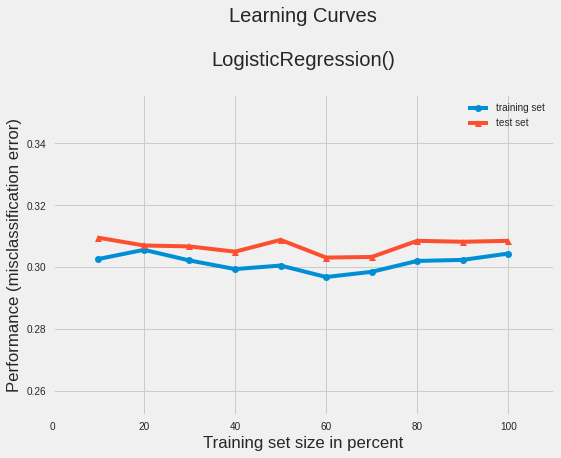

In [ ]:
from mlxtend.plotting import plot_learning_curves
 
# Plot the learning curves
plot_learning_curves(X_train, y_train, X_test, y_test, LR)

/usr/local/lib/python3.8/dist-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


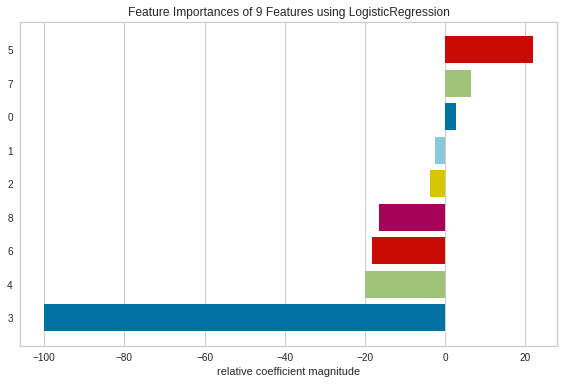

In [ ]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(LR)
viz.fit(X_train, y_train)
viz.show()

# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_dt=DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm=confusion_matrix(y_test, y_pred_dt)
cm

array([[ 379,    7,    2,  189,    0,    0],
       [   0, 2166,  337,  410,    0,   18],
       [   1,  421, 1101,   20,   22,  246],
       [ 199,  400,   28, 2068,    1,    4],
       [   0,    1,   21,    0,  340,  211],
       [   0,   28,  278,    3,  224,  848]])

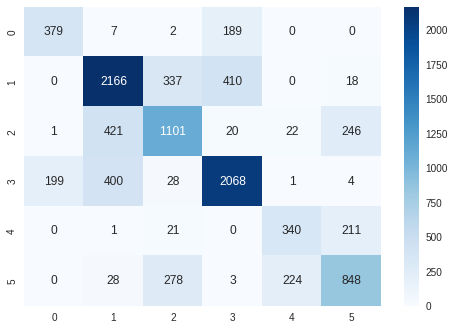

In [ ]:
ax=sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')

In [ ]:
print(classification_report(y_test,y_pred_dt))


              precision    recall  f1-score   support

        Good       0.65      0.66      0.66       577
    Moderate       0.72      0.74      0.73      2931
        Poor       0.62      0.61      0.62      1811
Satisfactory       0.77      0.77      0.77      2700
      Severe       0.58      0.59      0.59       573
   Very Poor       0.64      0.61      0.63      1381

    accuracy                           0.69      9973
   macro avg       0.66      0.66      0.66      9973
weighted avg       0.69      0.69      0.69      9973



In [ ]:
score =accuracy_score(y_test,y_pred_dt)
score

0.6920685851799859

([0.0015045135406218655,
  0.0012536041118214867,
  0.0015878321912084238,
  0.0014415543716703228,
  0.0015042117930204573,
  0.0015878321912084238,
  0.0016475054618387594,
  0.0016922594797869007,
  0.0016156438898019443,
  0.001679703168872844],
 [0.3426250877368896,
  0.3247768976235837,
  0.3271833951669508,
  0.3241752732377419,
  0.31775794645542965,
  0.3115411611350647,
  0.31595307329790434,
  0.31003710017046027,
  0.3123433269828537,
  0.3051238343527524])

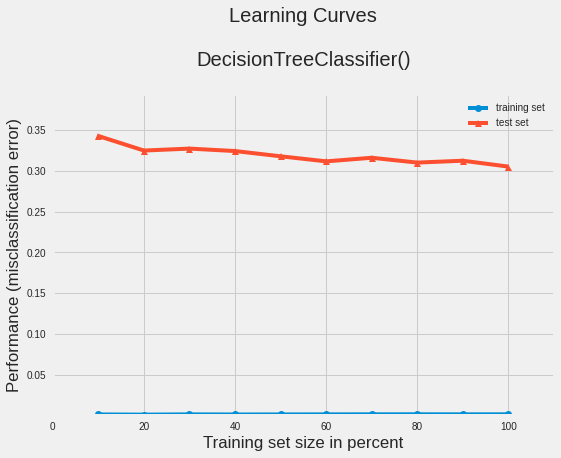

In [ ]:
from mlxtend.plotting import plot_learning_curves
 
# Plot the learning curves
plot_learning_curves(X_train, y_train, X_test, y_test, clf_dt)

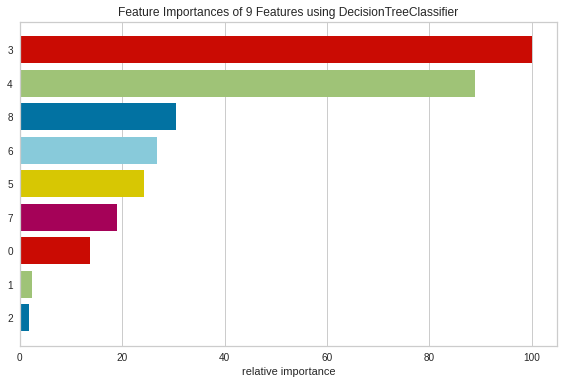

In [ ]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(clf_dt)
viz.fit(X_train, y_train)
viz.show()

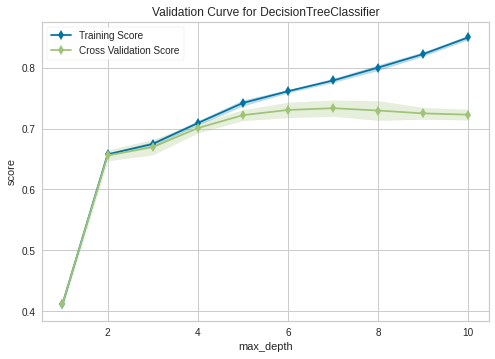

In [ ]:
from yellowbrick.model_selection import validation_curve

viz = validation_curve(
    clf_dt, X_test, y_test, param_name="max_depth",
    param_range=np.arange(1, 11),
)

From the above graph we can see that as the number of max_depth increases training score increases but cross validation
score decreases. This is because of overfitting. so max_depth parameter can be taken as 3 because after 3 CV is decreasing.

In [ ]:
clf_dt=DecisionTreeClassifier(max_depth=4)
clf_dt = clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm=confusion_matrix(y_test, y_pred_dt)
cm

array([[ 388,    7,    2,  180,    0,    0],
       [   6, 2098,  442,  376,    0,    9],
       [   0,  232, 1450,   19,    4,  106],
       [ 181,  514,   16, 1985,    0,    4],
       [   0,    1,   27,    0,  447,   98],
       [   0,    9,  355,    6,  267,  744]])

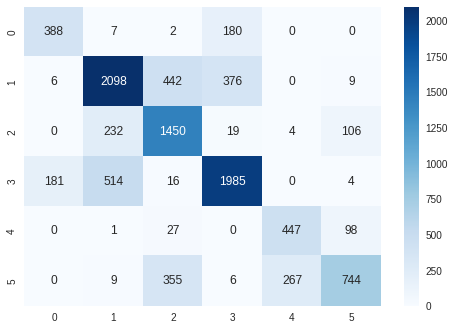

In [ ]:
ax=sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')

In [ ]:
score =accuracy_score(y_test,y_pred_dt)
score

0.713125438684448

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.71245926 0.71095513 0.70669341 0.72624718 0.70970168 0.72424166
 0.72424166 0.71672098 0.71313942 0.71389168]


In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7066934068688895, 0.7158292060940907, 0.7262471797442969)

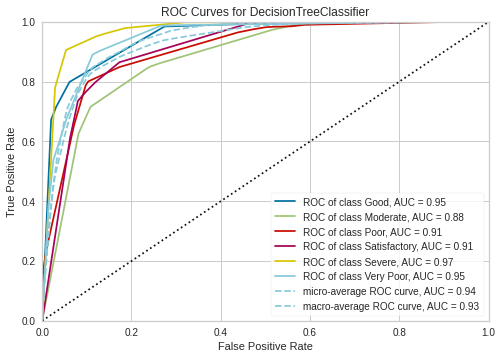

In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(clf_dt)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()  

# **Random Forest**

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7649654065978141


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm1=confusion_matrix(y_test,y_pred)
cm1

array([[ 397,    2,    1,  177,    0,    0],
       [   1, 2422,  189,  307,    0,   12],
       [   1,  371, 1232,   11,    7,  189],
       [ 129,  324,   10, 2233,    0,    4],
       [   0,    1,   13,    0,  387,  172],
       [   0,   14,  237,    2,  170,  958]])

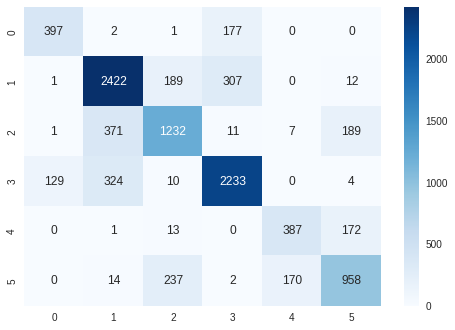

In [ ]:
ax1=sns.heatmap(cm1,annot=True,fmt='d',cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.75      0.69      0.72       577
    Moderate       0.77      0.83      0.80      2931
        Poor       0.73      0.68      0.71      1811
Satisfactory       0.82      0.83      0.82      2700
      Severe       0.69      0.68      0.68       573
   Very Poor       0.72      0.69      0.71      1381

    accuracy                           0.76      9973
   macro avg       0.75      0.73      0.74      9973
weighted avg       0.76      0.76      0.76      9973



([0.0015045135406218655,
  0.0012536041118214867,
  0.0015878321912084238,
  0.0014415543716703228,
  0.0015042117930204573,
  0.0015878321912084238,
  0.0016833207979656888,
  0.0017549357568160452,
  0.0016156438898019443,
  0.001679703168872844],
 [0.2565928005615161,
  0.24636518600220594,
  0.23974731775794644,
  0.24175273237741904,
  0.2381429860623684,
  0.23864433971723653,
  0.2346335104782914,
  0.2350345934021859,
  0.2319262007420034,
  0.23353053243758146])

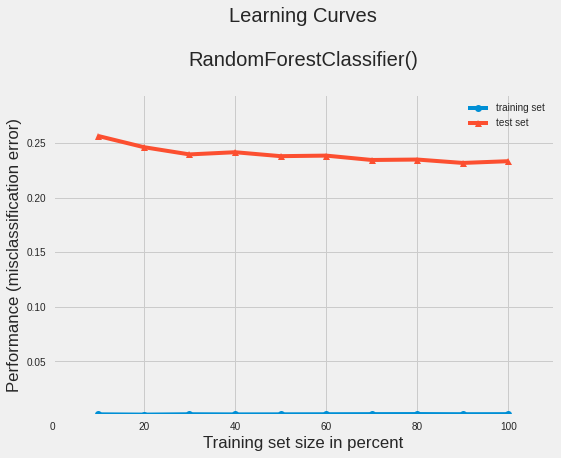

In [ ]:
from mlxtend.plotting import plot_learning_curves
 
# Plot the learning curves
plot_learning_curves(X_train, y_train, X_test, y_test, clf)

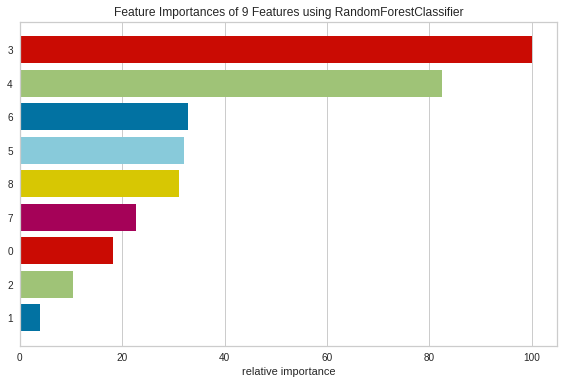

In [ ]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(clf)
viz.fit(X_train, y_train)
viz.show()

In [ ]:
scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.77011782 0.78841815 0.76911507 0.77989471 0.7731261  0.77889195
 0.76635748 0.77563299 0.77933801 0.76278837]


In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7627883650952858, 0.7743680653391612, 0.7884181499122587)

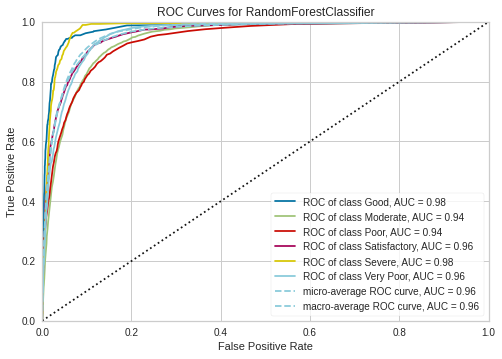

In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(clf)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()  

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.766870550486313


([0.0015045135406218655,
  0.0012536041118214867,
  0.0015878321912084238,
  0.0014415543716703228,
  0.0015042117930204573,
  0.0015878321912084238,
  0.0016475054618387594,
  0.0017235976183014728,
  0.001671355748070977,
  0.001679703168872844],
 [0.2520806176677028,
  0.24486112503760152,
  0.23934623483405193,
  0.23974731775794644,
  0.24034894214378824,
  0.23663892509776396,
  0.23583675924997494,
  0.23724054948360573,
  0.23312944951368694,
  0.23343026170660783])

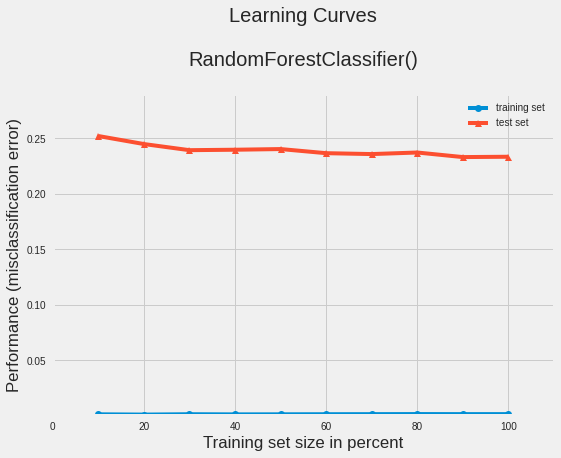

In [ ]:
from mlxtend.plotting import plot_learning_curves
 
# Plot the learning curves
plot_learning_curves(X_train, y_train, X_test, y_test, clf)

# KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn1=knn.fit(X_train, y_train)

In [ ]:
y_pred_knn=knn1.predict(X_test)

In [ ]:
score =accuracy_score(y_test,y_pred_knn)
score

0.7237541361676527

In [ ]:
cm5=confusion_matrix(y_test, y_pred_knn)

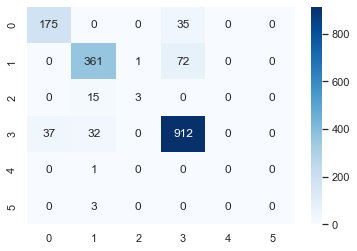

In [ ]:
ax5=sns.heatmap(cm5,annot=True,fmt='d',cmap='Blues')

([0.13677811550151975,
  0.11921032649962035,
  0.10323886639676114,
  0.10474383301707779,
  0.09380692167577413,
  0.09261133603238866,
  0.09195402298850575,
  0.09240986717267552,
  0.08955979085849215,
  0.08500303582270795],
 [0.16332726168791742,
  0.15786278081360047,
  0.14268366727383122,
  0.1366120218579235,
  0.12689738919247115,
  0.12568306010928962,
  0.12386156648451731,
  0.12507589556769885,
  0.12568306010928962,
  0.11900425015179114])

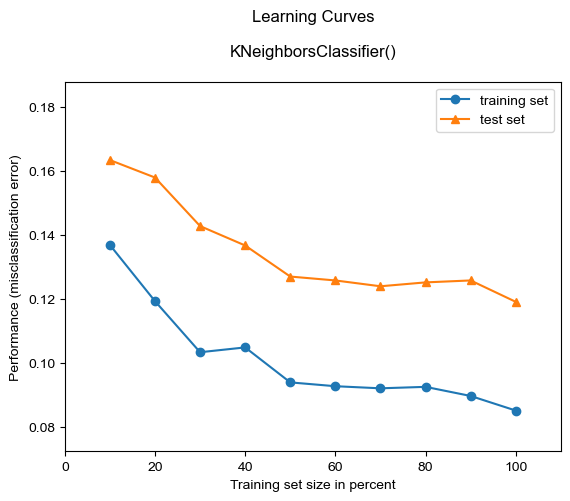

In [ ]:
plot_learning_curves(X_train, y_train, X_test, y_test, knn1)

In [ ]:
scores = cross_val_score(knn, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.87253414 0.85887709 0.86342944 0.87556904 0.8801214  0.86342944
 0.86494689 0.87253414 0.88753799 0.87993921]


In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.858877086494689, 0.8718918781796129, 0.8875379939209727)

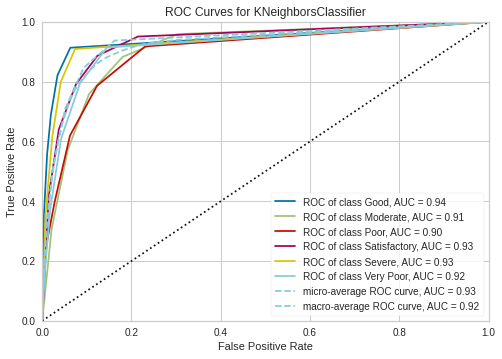

In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(knn)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

# XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
reg= xgb.XGBClassifier(n_estimators=10,learning_rate=0.01)
xgb_model=reg.fit(X_train, y_train)
y_pred_xg=reg.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

        Good       0.68      0.68      0.68       577
    Moderate       0.70      0.75      0.72      2931
        Poor       0.68      0.72      0.70      1811
Satisfactory       0.76      0.74      0.75      2700
      Severe       0.63      0.78      0.69       573
   Very Poor       0.76      0.57      0.65      1381

    accuracy                           0.71      9973
   macro avg       0.70      0.71      0.70      9973
weighted avg       0.72      0.71      0.71      9973



In [ ]:
score =accuracy_score(y_test,y_pred_xg)
score

0.7130251679534744

In [ ]:
cm3=confusion_matrix(y_test, y_pred_xg)

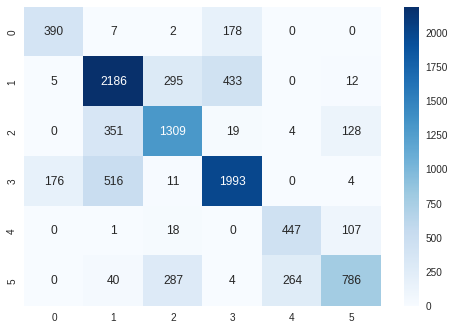

In [ ]:
ax3=sns.heatmap(cm3,annot=True,fmt='d',cmap='Blues')

([0.27657973921765294,
  0.2737871380218127,
  0.2761156610396122,
  0.27452209338765277,
  0.27552146008824707,
  0.27306535183018554,
  0.27470362809354965,
  0.27420871200250707,
  0.2735452241009499,
  0.27562174087444846],
 [0.3046224806978843,
  0.29018349543768174,
  0.2935927002907851,
  0.2896821417828136,
  0.290384036899629,
  0.2913867442093653,
  0.2910859320164444,
  0.28988268324476085,
  0.2858718540058157,
  0.28697483204652563])

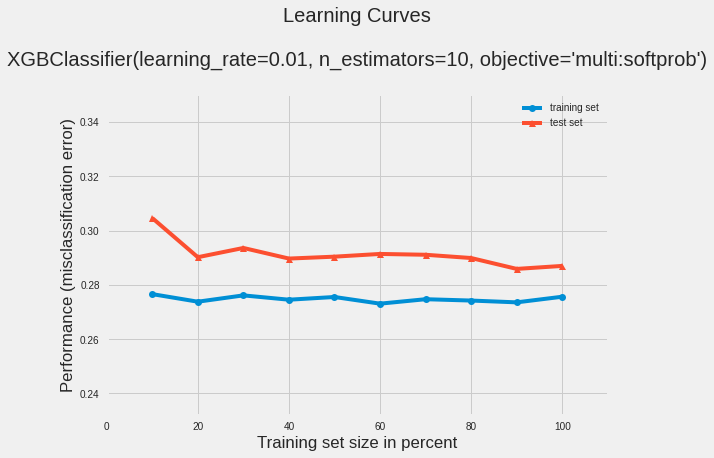

In [ ]:
from mlxtend.plotting import plot_learning_curves
 
# Plot the learning curves
plot_learning_curves(X_train, y_train, X_test, y_test, xgb_model)

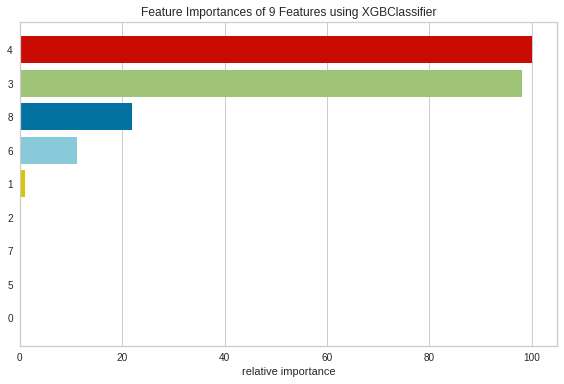

In [ ]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(xgb_model)
viz.fit(X_train, y_train)
viz.show()

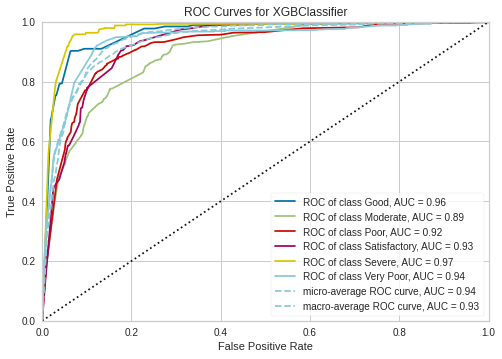

In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(xgb_model)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()  

# AdaBoost 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier #For Classification
cl_dtree = AdaBoostClassifier( base_estimator=DecisionTreeClassifier())
cldtree=cl_dtree.fit(X_train,y_train)

In [ ]:
y_pred_Ada=cldtree.predict(X_test)


In [ ]:
score =accuracy_score(y_test,y_pred_Ada)
score

0.7417025970119322

In [ ]:
cm4=confusion_matrix(y_test, y_pred_Ada)

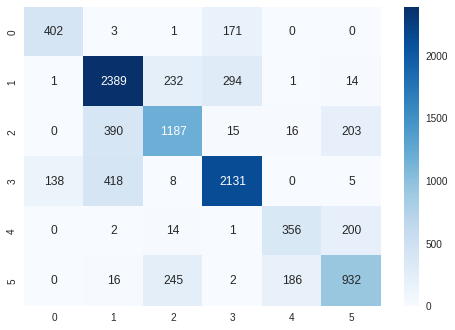

In [ ]:
ax4=sns.heatmap(cm4,annot=True,fmt='d',cmap='Blues')

([0.0015045135406218655,
  0.0012536041118214867,
  0.0015878321912084238,
  0.0014415543716703228,
  0.002757721620537505,
  0.0054738425539027245,
  0.003509902940439096,
  0.0019429645879034784,
  0.001671355748070977,
  0.0036101083032490976],
 [0.2740399077509275,
  0.2582974029880678,
  0.2563922590995688,
  0.2556903639827534,
  0.2545873859420435,
  0.2492730372004412,
  0.2496741201243357,
  0.2499749323172566,
  0.2440589591898125,
  0.25849794445001506])

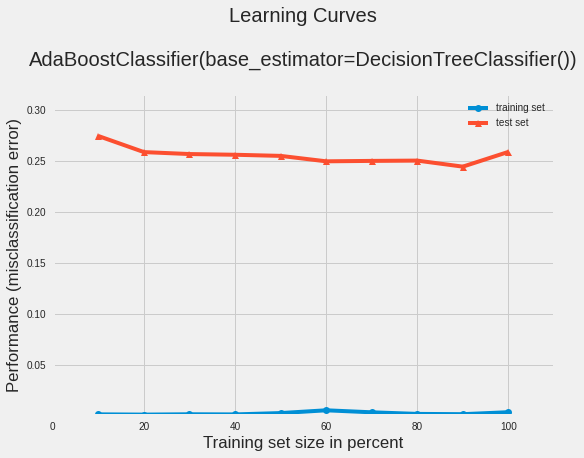

In [ ]:
plot_learning_curves(X_train, y_train, X_test, y_test, cldtree)

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:631: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


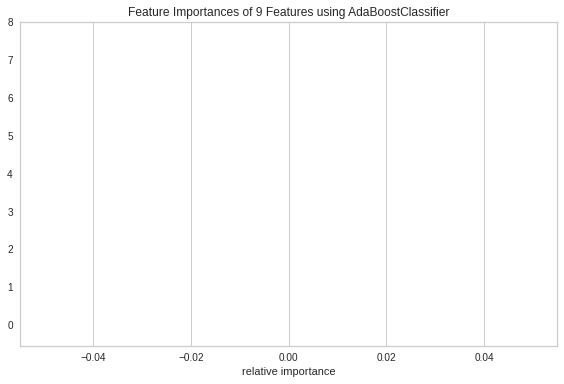

In [ ]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(cldtree)
viz.fit(X_train, y_train)
viz.show()

In [ ]:
scores = cross_val_score(cldtree, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.73351717 0.75231888 0.75482577 0.76084232 0.74730509 0.7540737
 0.74153923 0.74204061 0.75501505 0.75827482]


In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7335171722236149, 0.7499752642233545, 0.7608423163700175)

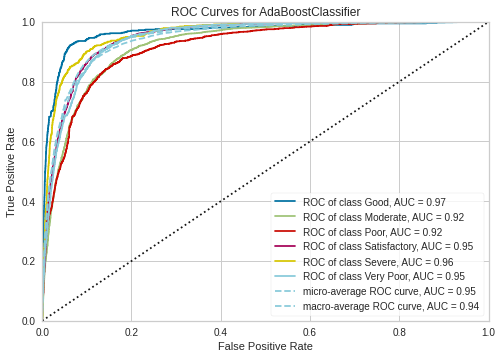

In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(cldtree)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()  

From the above graph we can see that the the False positive rate for AQI Bucket value Poor is high

# **Timeseries**


**METHOD 1**

In [ ]:
data_t=data2[['Date','AQI']]

In [ ]:
data_t

Date    AQI
4365   2018-11-11  201.0
4366   2018-11-12  353.0
4367   2018-11-13  353.0
4368   2018-11-14  353.0
4369   2018-11-15  280.0
...           ...    ...
77393  2020-06-27   61.0
77394  2020-06-28   65.0
77395  2020-06-29   63.0
77396  2020-06-30   61.0
77397  2020-07-01   61.0

[49861 rows x 2 columns]

In [ ]:
#set hour as index column
data_t.set_index('Date')
data_t.index = pd.to_datetime(data_t.Date)
data_t.drop(['Date'], axis = 1, inplace=True)
data_t.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


AQI
Date             
2018-11-11  201.0
2018-11-12  353.0
2018-11-13  353.0
2018-11-14  353.0
2018-11-15  280.0

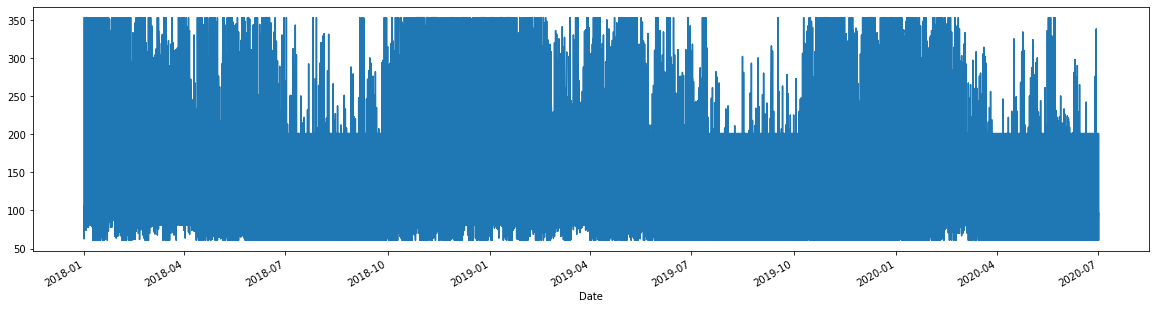

In [ ]:
data_t['AQI'].plot(figsize=(20,5)) #plot the graph

In [ ]:
from statsmodels.tsa.stattools import adfuller
test=adfuller(data_t['AQI'],autolag ='AIC')
test # If p< 0.05 ; Data is stationary

(-15.963198232377714,
 7.139913757761461e-29,
 57,
 49803,
 {'1%': -3.4304813101034073,
  '5%': -2.861598036363896,
  '10%': -2.566800890837946},
 506158.1330768897)

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


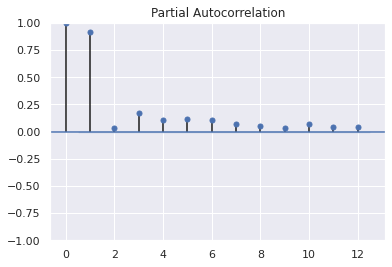

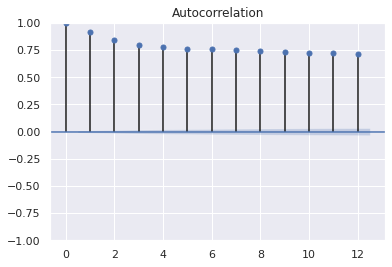

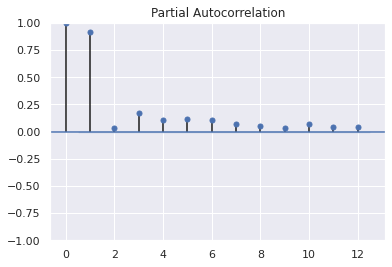

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_t,lags=12)
plot_pacf(data_t,lags=12)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
add_result = seasonal_decompose(data_t['AQI'], model='addictive',period=1)

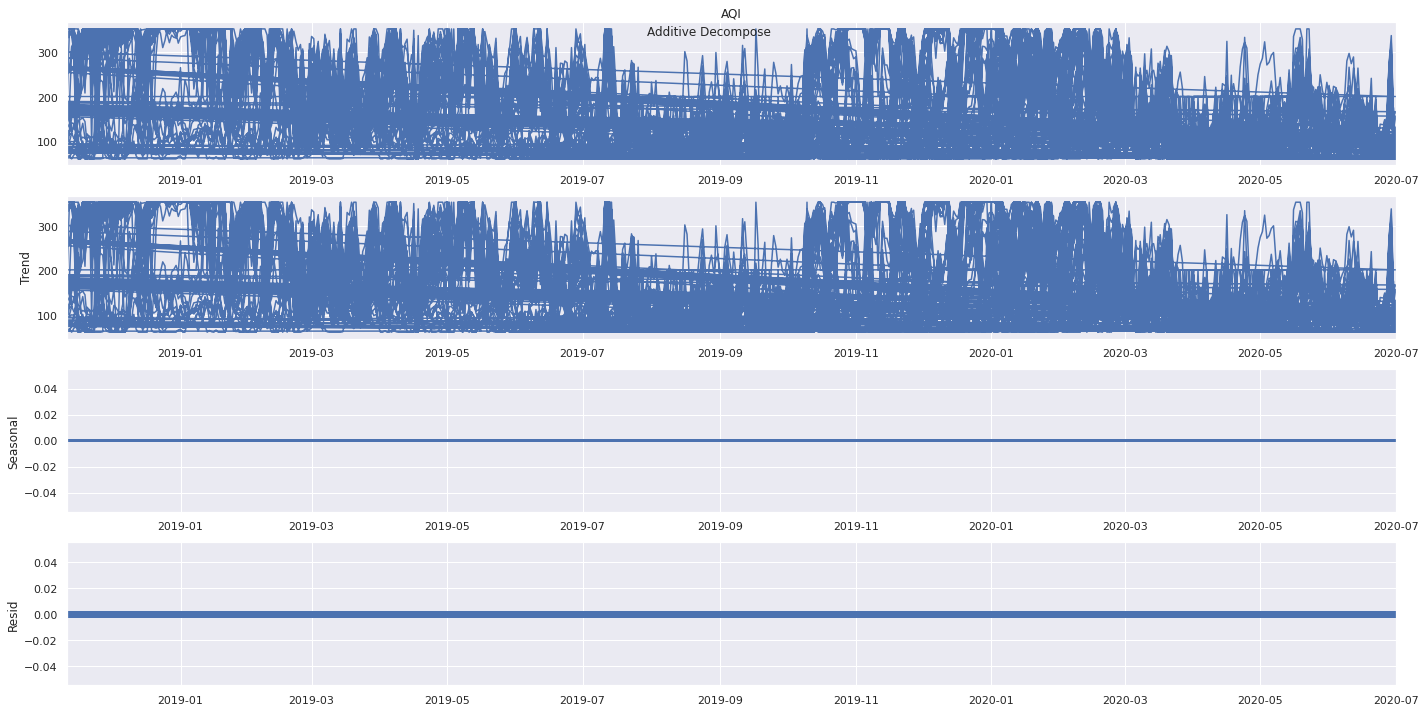

In [ ]:
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20,10
add_result.plot().suptitle('\nAdditive Decompose')
plt.show()

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 70.7 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(data_t['AQI'],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=507702.176, Time=33.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=514064.335, Time=1.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=513758.816, Time=2.84 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=513525.012, Time=8.92 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=514062.335, Time=0.59 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=507700.841, Time=26.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=509502.333, Time=13.79 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=508460.288, Time=20.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=507702.427, Time=39.66 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=508151.248, Time=25.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=507715.341, Time=27.90 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=507704.549, Time=51.54 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=507698.850, Time=9.62 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=509500.332, Time=6.36 s

In [ ]:
from statsmodels.tsa.arima_model import ARMA

In [ ]:
import statsmodels.api as sm

In [ ]:
data_se=data_t.squeeze()

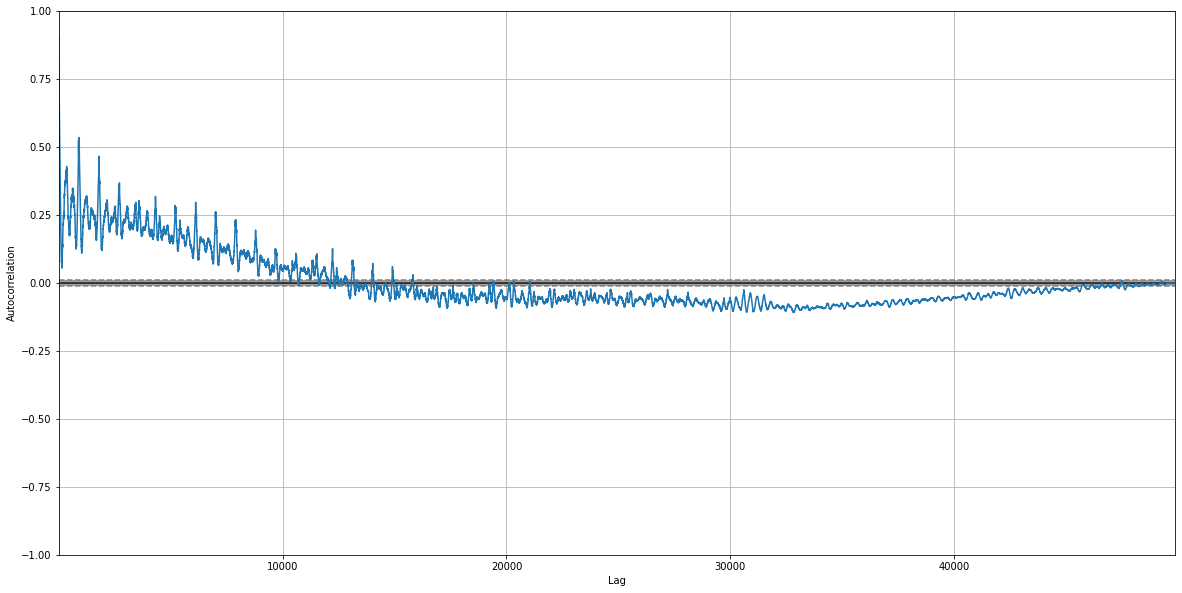

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data_se)
plt.show()

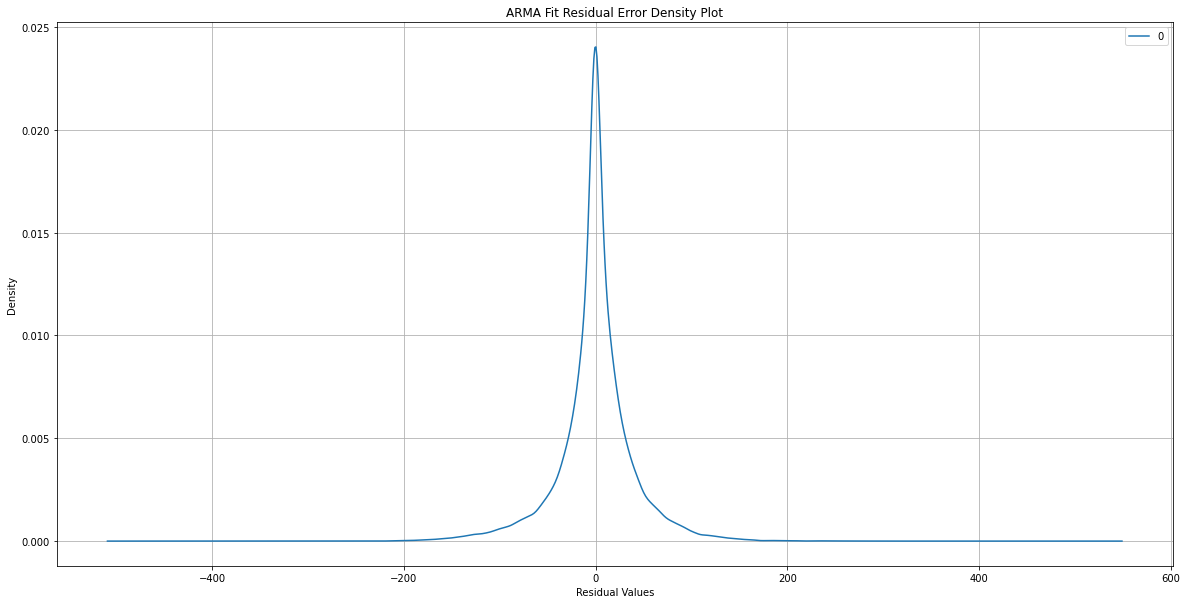

                  0
count  4.986100e+04
mean  -9.295298e-03
std    3.935027e+01
min   -2.446675e+02
25%   -1.381857e+01
50%    2.842171e-14
75%    1.562276e+01
max    2.846592e+02


In [ ]:
residuals.plot(kind='kde')
plt.title('ARMA Fit Residual Error Density Plot')
plt.xlabel('Residual Values')
plt.grid()
plt.show()
print(residuals.describe())

In [ ]:
from sklearn.metrics import mean_squared_error
 

X = data_se.values
size = int(len(X) * 0.66)


train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []


for t in range(len(test)):
	model = sm.tsa.arima.ARIMA(history, order=(1,1,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
    




# plot
plt.plot(test, label = 'original sales', marker = '*')
plt.plot(predictions, color='red', label = 'predicted sales', marker = '*')
plt.title('Performance Evaluation')
plt.xlabel('Future Steps')
plt.ylabel('Sales')
plt.legend()
plt.show()

predicted=109.879570, expected=97.000000
predicted=116.504979, expected=94.000000
predicted=109.854714, expected=99.000000
predicted=112.904821, expected=99.000000
predicted=110.250778, expected=110.000000
predicted=118.168888, expected=160.000000
predicted=156.705369, expected=104.000000
predicted=103.557074, expected=102.000000
predicted=112.195879, expected=107.000000
predicted=113.145582, expected=110.000000
predicted=114.525635, expected=114.000000
predicted=116.889090, expected=92.000000
predicted=97.846234, expected=111.000000
predicted=116.323031, expected=125.000000
predicted=123.532577, expected=152.000000
predicted=144.649928, expected=197.000000
predicted=178.822991, expected=123.000000
predicted=113.870117, expected=90.000000
predicted=100.486278, expected=84.000000
predicted=96.550841, expected=163.000000
predicted=160.646385, expected=92.000000
predicted=90.068289, expected=115.000000
predicted=122.910529, expected=131.000000
predicted=128.623486, expected=135.000000
pre

In [ ]:
import math
error = mean_squared_error(test, predictions)
print('Test Root Mean Squared Error: %.3f' % math.sqrt(error))

In [ ]:

X = data_t.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
print(type(train))


<class 'numpy.ndarray'>


In [ ]:
# from statsmodels.tsa.arima_model import ARIMA
model=sm.tsa.arima.ARIMA(train,order=(1,0,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                39888
Model:                 ARIMA(1, 0, 1)   Log Likelihood             -207044.346
Date:                Tue, 10 Jan 2023   AIC                         414096.693
Time:                        12:29:39   BIC                         414131.068
Sample:                             0   HQIC                        414107.575
                              - 39888                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        192.4895      2.545     75.642      0.000     187.502     197.477
ar.L1          0.9121      0.003    276.666      0.000       0.906       0.919
ma.L1         -0.0579      0.004    -14.555      0.000      -0.066      -0.050
sigma2      1888.1781     10.676    176.855      0.000    1867.253    1909.104
===================================================================================
Ljung-Box (L1) (Q):                   3.52   Jarque-Bera (JB):             16958.72
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**METHOD 2**

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 10.3 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6750741 sha256=1b8f48b2513724c11442c3fde4bfb43a666bb1e5d3981e407ac3a030e574a555
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdsta

In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet

In [ ]:
data_t1=data2[['Date','AQI']]

In [ ]:
data_t1=data_t1.rename(columns={"Date": "ds","AQI":"y"})

In [ ]:
# #set hour as index column
# data_t1.set_index('ds')
# data_t1.index = pd.to_datetime(data_t1.DS)
# data_t1.drop(['ds'], axis = 1, inplace=True)
data_t1

ds      y
4365   2018-11-11  201.0
4366   2018-11-12  404.0
4367   2018-11-13  406.0
4368   2018-11-14  372.0
4369   2018-11-15  280.0
...           ...    ...
77393  2020-06-27   50.0
77394  2020-06-28   65.0
77395  2020-06-29   63.0
77396  2020-06-30   57.0
77397  2020-07-01   59.0

[49861 rows x 2 columns]

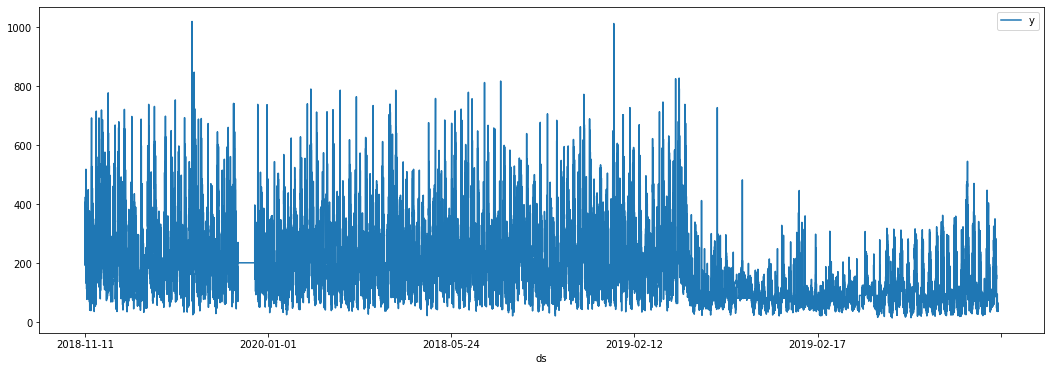

In [ ]:
data_t1.plot(x='ds',y='y',figsize=(18,6))

In [ ]:
data_t1.shape

(49861, 2)

In [ ]:
X = data_t1.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
print(type(train))

<class 'numpy.ndarray'>


In [ ]:
df_train = pd.DataFrame(data = train, 
                        columns = ["ds",
                                   "y"])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


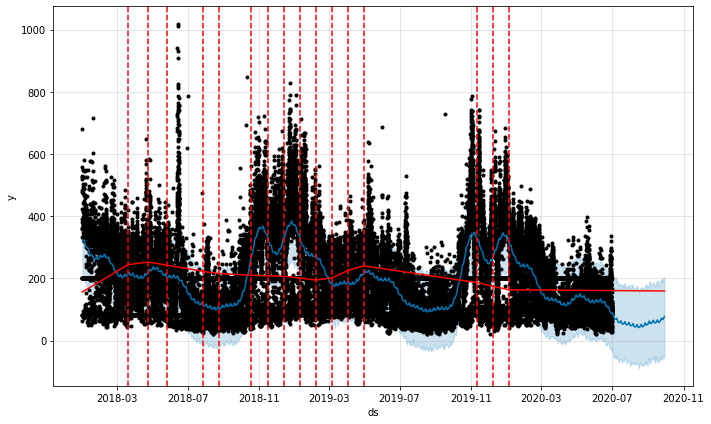

In [ ]:
prophet = Prophet()
prophet.fit(df_train)
future = prophet.make_future_dataframe(periods=90, freq='D')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
from prophet.plot import add_changepoints_to_plot
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)

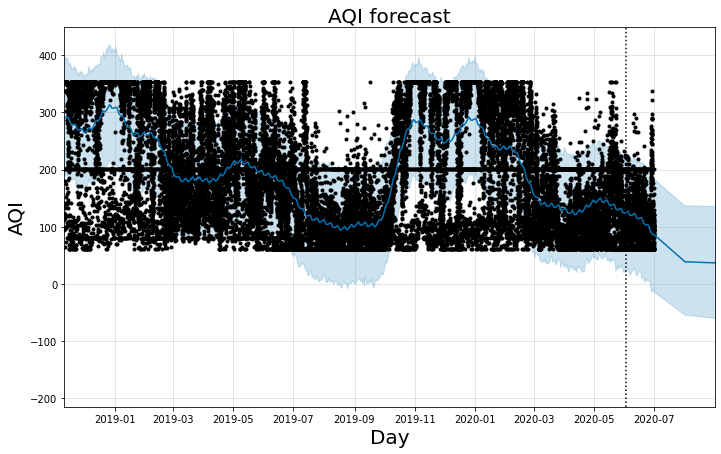

In [ ]:
from datetime import datetime, timedelta
fig1 = prophet.plot(forecast)#datenow = datetime.now()
datenow = datetime(2020, 6, 2)
dateend = datenow + timedelta(days=90)
datestart = datetime(2018, 11, 11)
plt.xlim([datestart, dateend])
plt.title("AQI forecast", fontsize=20)
plt.xlabel("Day", fontsize=20)
plt.ylabel("AQI", fontsize=20)
plt.axvline(datenow, color="k", linestyle=":")
plt.show()

In [ ]:
forecast.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
926 2021-09-01  62.350649 -184.666007  121.751392   -53.096920   183.617627   
927 2021-10-01  56.948196 -175.062854  164.511047   -70.167660   194.519096   
928 2021-11-01  51.365662  -30.665921  326.084723   -87.962026   202.181520   
929 2021-12-01  45.963209  -64.074492  319.261959  -108.694003   211.205916   
930 2022-01-01  40.380675  -49.875337  368.465788  -130.781002   217.924421   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
926      -89.410871            -89.410871            -89.410871  2.148371   
927      -61.052769            -61.052769            -61.052769  1.013769   
928       99.784770             99.784770             99.784770 -1.975294   
929       73.585508             73.585508             73.585508  2.148371   
930      111.829365            111.829365            111.829365 -2.585713   

     weekly_lower  weekly_upper      yearly  yearly_lower  yearly_upper  \
926      2.148371      2.148371  -91.559242    -91.559242    -91.559242   
927      1.013769      1.013769  -62.066538    -62.066538    -62.066538   
928     -1.975294     -1.975294  101.760064    101.760064    101.760064   
929      2.148371      2.148371   71.437137     71.437137     71.437137   
930     -2.585713     -2.585713  114.415078    114.415078    114.415078   

     multiplicative_terms  multiplicative_terms_lower  \
926                   0.0                         0.0   
927                   0.0                         0.0   
928                   0.0                         0.0   
929                   0.0                         0.0   
930                   0.0                         0.0   

     multiplicative_terms_upper        yhat  
926                         0.0  -27.060223  
927                         0.0   -4.104573  
928                         0.0  151.150431  
929                         0.0  119.548717  
930                         0.0  152.210040

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
926 2021-09-01  -27.060223 -184.666007  121.751392
927 2021-10-01   -4.104573 -175.062854  164.511047
928 2021-11-01  151.150431  -30.665921  326.084723
929 2021-12-01  119.548717  -64.074492  319.261959
930 2022-01-01  152.210040  -49.875337  368.465788

In [ ]:
df_test = pd.DataFrame(data = test, 
                        columns = ["ds",
                                   "y"])
df_test.tail()

ds     y
9968  2020-06-27  50.0
9969  2020-06-28  65.0
9970  2020-06-29  63.0
9971  2020-06-30  57.0
9972  2020-07-01  59.0

In [ ]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
import plotly.graph_objs as go
plot_plotly(prophet,forecast)

In [ ]:
plot_components_plotly(prophet, forecast)

In [ ]:
from statsmodels.tools.eval_measures import rmse
predictions = forecast['yhat']
predictions

0       321.902599
1       321.662462
2       322.509252
3       323.716549
4       317.644593
           ...    
998      71.404139
999      67.327448
1000     70.119139
1001     72.972412
1002     77.793429
Name: yhat, Length: 1003, dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline

In [ ]:
data2=data1.copy()

In [ ]:
df = data2[['Date', 'AQI']].dropna()
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

daily_df = df.resample('D').mean()
d_df = daily_df.reset_index().dropna()
d_df

Date         AQI
0   2018-01-01  313.937500
1   2018-01-02  312.187500
2   2018-01-03  299.770833
3   2018-01-04  293.895833
4   2018-01-05  299.187500
..         ...         ...
908 2020-06-27   88.371212
909 2020-06-28  136.901515
910 2020-06-29  156.386364
911 2020-06-30   90.878788
912 2020-07-01   82.219697

[913 rows x 2 columns]

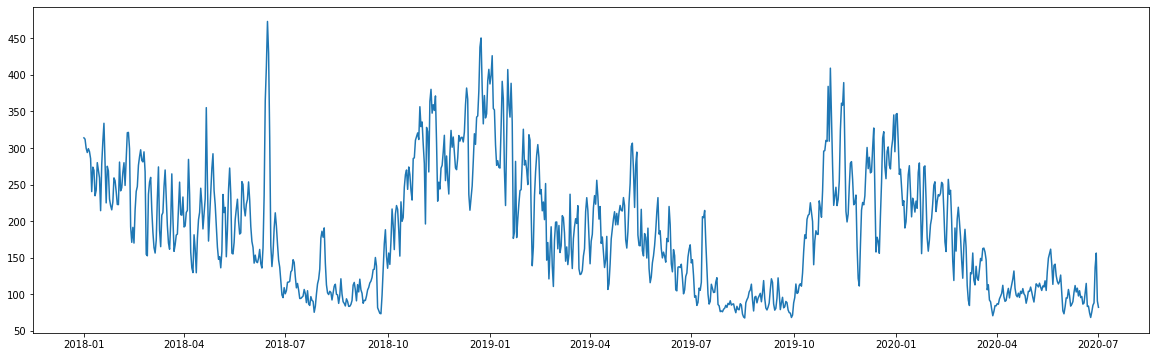

In [ ]:
d_df.columns = ['ds', 'y']
fig = plt.figure(facecolor='w', figsize=(20, 6))
plt.plot(d_df.ds, d_df.y)

In [ ]:
m = Prophet()
m.fit(d_df)
future = m.make_future_dataframe(periods=360)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds       yhat  yhat_lower  yhat_upper
1268 2021-06-22  18.474621  -36.406491   75.062934
1269 2021-06-23  18.589272  -36.797476   74.561591
1270 2021-06-24  18.659106  -34.179367   71.267532
1271 2021-06-25  13.202295  -37.148735   65.346530
1272 2021-06-26   5.117963  -49.448415   59.389982

In [ ]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
import plotly.graph_objs as go
plot_plotly(m,forecast)

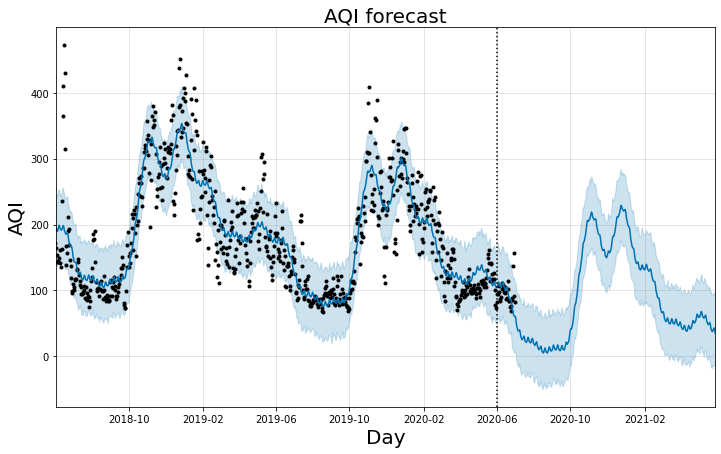

In [ ]:
from datetime import datetime, timedelta
fig1 = m.plot(forecast)#datenow = datetime.now()
datenow = datetime(2020, 6, 2)
dateend = datenow + timedelta(days=360)
datestart = datetime(2018, 6, 2)
plt.xlim([datestart, dateend])
plt.title("AQI forecast", fontsize=20)
plt.xlabel("Day", fontsize=20)
plt.ylabel("AQI", fontsize=20)
plt.axvline(datenow, color="k", linestyle=":")
plt.show()

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-900:]

ds        yhat  yhat_lower  yhat_upper
373  2019-01-09  310.110604  256.338223  362.587024
374  2019-01-10  308.735231  252.934237  364.815908
375  2019-01-11  302.049903  250.639306  358.814790
376  2019-01-12  292.978758  235.497095  347.884895
377  2019-01-13  288.289145  229.924319  338.538198
...         ...         ...         ...         ...
1268 2021-06-22   18.474621  -36.406491   75.062934
1269 2021-06-23   18.589272  -36.797476   74.561591
1270 2021-06-24   18.659106  -34.179367   71.267532
1271 2021-06-25   13.202295  -37.148735   65.346530
1272 2021-06-26    5.117963  -49.448415   59.389982

[900 rows x 4 columns]

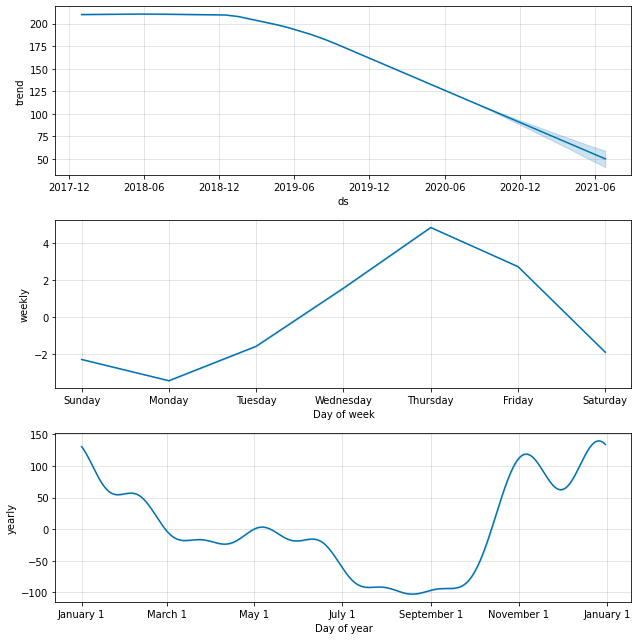

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(m, horizon="90 days")
df_p = performance_metrics(df_cv)
df_p.head(5)

INFO:fbprophet:Making 11 forecasts with cutoffs between 2019-01-08 00:00:00 and 2020-04-02 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

horizon          mse       rmse        mae      mape     mdape  coverage
0  9 days  2914.715948  53.988109  42.556330  0.272024  0.209299  0.747475
1 10 days  2991.199403  54.691859  42.760241  0.276148  0.204553  0.747475
2 11 days  2966.694630  54.467372  42.132681  0.272179  0.191755  0.747475
3 12 days  3025.415059  55.003773  42.372586  0.268713  0.191466  0.727273
4 13 days  2747.950005  52.420893  40.293655  0.258459  0.187056  0.757576

/usr/local/lib/python3.8/dist-packages/fbprophet/plot.py:526: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.8/dist-packages/fbprophet/plot.py:527: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



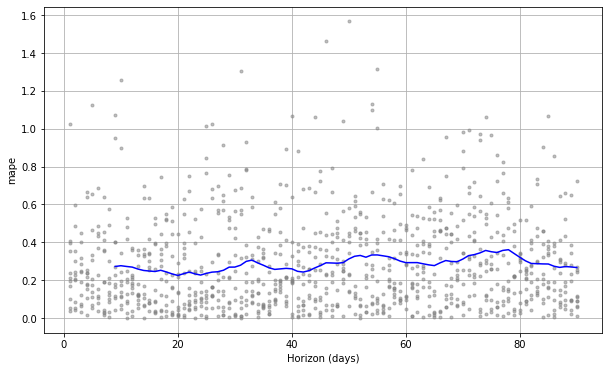

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv, metric='mape')

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
r2_score(original price,predicted price)